#### <font color='maroon'>Dervla Scully 18329511

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import calendar
from matplotlib import pyplot as plt
import datetime
from pprint import pprint
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter
import seaborn as seab
%matplotlib inline

# <font color='firebrick'>1. Data Identification & Collection</font>

The API which I have chosen for the project is the __The Historical Weather API__ provided by __World Weather Online__.

This API allows the user to make a variety of queries from Weather data collected from 2008 until the present day. Users can query data for specific dates, times and locations, and for specific weather elements, such as max temperature, precipitation, humidity, etc.

The API documentation can be found here: https://www.worldweatheronline.com/developer/premium-api-explorer.aspx

The API key that I used was: 1897112b5a73457f843141220200311

 

### <font color='indianred'>Data Collection</font>

The data I will be working with in this project is all of the __weather information for Dublin, Ireland for each day of the year 2018__.


This API allows a max of 34 days to be queried at a time. Therefore, I decided to query each month of the year 2018  seperately. 

I constructed the list dates to hold lists of the start and end dates that I wanted to query. I needed the start and end date of each month of 2018 so I used calendar.monthrange().

In [2]:
dates = []
for i in range (1, 13):
    start = "2018-" + ("%02d" % (i)) + "-01"
    end = "2018-" + ("%02d" % (i)) + "-" + ("%02d" % (calendar.monthrange(2018,i)[1]))
    dates.append([start,end])
    
print("Dates to query:\n")
print("\nDates:\n")
pprint(dates)

Dates to query:


Dates:

[['2018-01-01', '2018-01-31'],
 ['2018-02-01', '2018-02-28'],
 ['2018-03-01', '2018-03-31'],
 ['2018-04-01', '2018-04-30'],
 ['2018-05-01', '2018-05-31'],
 ['2018-06-01', '2018-06-30'],
 ['2018-07-01', '2018-07-31'],
 ['2018-08-01', '2018-08-31'],
 ['2018-09-01', '2018-09-30'],
 ['2018-10-01', '2018-10-31'],
 ['2018-11-01', '2018-11-30'],
 ['2018-12-01', '2018-12-31']]


#### <font color='indianred'>API Requests

I constructed the list jsonRequests, to hold a list of API get requests converted to json objects.

I looped through the dates, and for each made a get request to the API for Dublin for that start/end date.
I converted each request to a json object.

Each json object was of the form:
{'data': {'request': [{'type': 'City', 'query': 'Dublin, Ireland'}], 'weather': [{ __DATA__}]}}
where __DATA__ represents the weather data I am interested in (date, max temperature, precipitation, humidity, hourly weather data, etc).
So for each request r I was interested in r["data"]["weather"].

In [3]:
jsonRequests = []
count=0

for date in dates: 
    
    s = str("http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=1897112b5a73457f843141220200311&q=Dublin&format=json&date="+date[0]+"&enddate="+date[1])
    r = requests.get(s).json()            
    jsonRequests.extend(r["data"]["weather"])
    count+=1

print("Requests to Historical Weather API complete.\n")
print("Total number of requests made: ", count)

Requests to Historical Weather API complete.

Total number of requests made:  12


#### <font color='indianred'>JSON Dump
Next I made a json dump to the file __"WeatherData.json"__, dumping my list of json requests constructed above.

In [4]:
with open("WeatherData.json", 'w') as f:
       json.dump(jsonRequests, f, indent=2)
        
print("Json dump complete.\n")

Json dump complete.



## <font color='firebrick'>2. Data Preperation

#### <font color='indianred'>Pandas Dataframe

I constructed the data frame __weatherDF__ using pandas read_json for the file "WeatherData.json"

In [5]:
weatherDF = pd.read_json("WeatherData.json")

print("weatherDF; Weather Dataset weatherDF input complete.\n")
print("weatherDF; weatherDF contains ",len(weatherDF)," entries.\n\nweatherDF:\n")

pd.options.display.max_columns = None  # display all columns when printing
pd.options.display.min_rows = 20 # display all rows when printing
display(weatherDF)

weatherDF; Weather Dataset weatherDF input complete.

weatherDF; weatherDF contains  365  entries.

weatherDF:



date                                          astronomy  maxtempC  \
0   2018-01-01  [{'sunrise': '08:40 AM', 'sunset': '04:17 PM',...         8   
1   2018-01-02  [{'sunrise': '08:40 AM', 'sunset': '04:18 PM',...        10   
2   2018-01-03  [{'sunrise': '08:40 AM', 'sunset': '04:19 PM',...         9   
3   2018-01-04  [{'sunrise': '08:39 AM', 'sunset': '04:20 PM',...        11   
4   2018-01-05  [{'sunrise': '08:39 AM', 'sunset': '04:22 PM',...         6   
5   2018-01-06  [{'sunrise': '08:39 AM', 'sunset': '04:23 PM',...         7   
6   2018-01-07  [{'sunrise': '08:38 AM', 'sunset': '04:24 PM',...         6   
7   2018-01-08  [{'sunrise': '08:37 AM', 'sunset': '04:26 PM',...         5   
8   2018-01-09  [{'sunrise': '08:37 AM', 'sunset': '04:27 PM',...         8   
9   2018-01-10  [{'sunrise': '08:36 AM', 'sunset': '04:29 PM',...         7   
..         ...                                                ...       ...   
355 2018-12-22  [{'sunrise': '08:38 AM', 'sunset': '04:08 PM',...         9   
356 2018-12-23  [{'sunrise': '08:39 AM', 'sunset': '04:09 PM',...         8   
357 2018-12-24  [{'sunrise': '08:39 AM', 'sunset': '04:10 PM',...        10   
358 2018-12-25  [{'sunrise': '08:40 AM', 'sunset': '04:10 PM',...        11   
359 2018-12-26  [{'sunrise': '08:40 AM', 'sunset': '04:11 PM',...        11   
360 2018-12-27  [{'sunrise': '08:40 AM', 'sunset': '04:12 PM',...        10   
361 2018-12-28  [{'sunrise': '08:40 AM', 'sunset': '04:13 PM',...        11   
362 2018-12-29  [{'sunrise': '08:40 AM', 'sunset': '04:14 PM',...        12   
363 2018-12-30  [{'sunrise': '08:40 AM', 'sunset': '04:15 PM',...        11   
364 2018-12-31  [{'sunrise': '08:40 AM', 'sunset': '04:16 PM',...        10   

     maxtempF  mintempC  mintempF  avgtempC  avgtempF  totalSnow_cm  sunHour  \
0          47         6        43         7        44           0.0      6.8   
1          50         5        41         8        47           0.0      4.8   
2          48         7        45         8        46           0.0      4.8   
3          51         6        43         7        45           0.0      6.8   
4          43         4        40         5        42           0.0      4.9   
5          44         6        42         6        43           0.0      4.9   
6          43         4        40         5        41           0.0      7.9   
7          41         4        39         4        40           0.0      7.9   
8          47         5        41         7        45           0.0      3.0   
9          45         5        41         6        43           0.0      7.9   
..        ...       ...       ...       ...       ...           ...      ...   
355        48         8        46         8        47           0.0      7.7   
356        47         8        46         8        46           0.0      2.9   
357        49         8        47         9        48           0.0      4.8   
358        52        10        50        11        51           0.0      2.9   
359        51         9        49        10        50           0.0      6.8   
360        49         8        47         9        48           0.0      6.8   
361        51         8        47        10        50           0.0      7.7   
362        54        10        51        11        52           0.0      7.7   
363        52         9        48        10        51           0.0      7.8   
364        50         9        47         9        48           0.0      2.9   

     uvIndex                                             hourly  
0          3  [{'time': '0', 'tempC': '6', 'tempF': '44', 'w...  
1          2  [{'time': '0', 'tempC': '5', 'tempF': '41', 'w...  
2          3  [{'time': '0', 'tempC': '7', 'tempF': '45', 'w...  
3          2  [{'time': '0', 'tempC': '7', 'tempF': '45', 'w...  
4          2  [{'time': '0', 'tempC': '6', 'tempF': '42', 'w...  
5          3  [{'time': '0', 'tempC': '6', 'tempF': '43', 'w...  
6          3  [{'time': '0', 'tempC': '5', 'temp

### <font color='indianred'>Data Preperation & Cleaning

I defined the functions __splitValues__ and __splitKeys__ to use when cleaning my dataset. They return the values/keys for a list contining a dictionary as the first element.


In [6]:
def splitValues(x):
    return [v for k,v in x[0].items()]
def splitKeys(x):
    return [k for k,v in x[0].items()]

#### <font color='indianred'>weatherDF - astronomy
I started by cleaning the __astromony__ series in the __weatherDF__ data set. For each date, the astronomy value is a list containing a dictionary, where the keys in the dictionary are weather elements that I am interested in such as sunrise, sunset, etc, and the values are the corresponding values for the weather elements for the date in question.

For each row in the astronomy series I applies splitValues, which returned a list of the values within the dictionaries for each row. I then converted this to a pd dataframe (called astronomy). I constructed columns in WeatherDF for each of the keys in the astronomy dictionaries, and then populated these using the lists in the astronomy dataframe.

I then dropped the original astronomy column from the dataframe.

In [7]:
# apply split values to each row in the astronomy series
astronomy = pd.DataFrame(weatherDF.astronomy.apply(splitValues))

# split the values in the astronomy dictionaries into columns
# column names can be extracted using split keys
weatherDF[weatherDF.astronomy.apply(splitKeys).tolist()[0]] = pd.DataFrame(astronomy.astronomy.tolist(), index=weatherDF.index)

In [8]:
print("weatherDF; Astronomy Before:\n")
display(weatherDF["astronomy"])

weatherDF; Astronomy Before:



0      [{'sunrise': '08:40 AM', 'sunset': '04:17 PM',...
1      [{'sunrise': '08:40 AM', 'sunset': '04:18 PM',...
2      [{'sunrise': '08:40 AM', 'sunset': '04:19 PM',...
3      [{'sunrise': '08:39 AM', 'sunset': '04:20 PM',...
4      [{'sunrise': '08:39 AM', 'sunset': '04:22 PM',...
5      [{'sunrise': '08:39 AM', 'sunset': '04:23 PM',...
6      [{'sunrise': '08:38 AM', 'sunset': '04:24 PM',...
7      [{'sunrise': '08:37 AM', 'sunset': '04:26 PM',...
8      [{'sunrise': '08:37 AM', 'sunset': '04:27 PM',...
9      [{'sunrise': '08:36 AM', 'sunset': '04:29 PM',...
                             ...                        
355    [{'sunrise': '08:38 AM', 'sunset': '04:08 PM',...
356    [{'sunrise': '08:39 AM', 'sunset': '04:09 PM',...
357    [{'sunrise': '08:39 AM', 'sunset': '04:10 PM',...
358    [{'sunrise': '08:40 AM', 'sunset': '04:10 PM',...
359    [{'sunrise': '08:40 AM', 'sunset': '04:11 PM',...
360    [{'sunrise': '08:40 AM', 'sunset': '04:12 PM',...
361    [{'sunrise': '08:40 AM',

In [9]:
print("\n\nweatherDF; Astronomy After:\n")
display(weatherDF[weatherDF.astronomy.apply(splitKeys).tolist()[0]]) # print the columns that were keys in 
                                                                     # the astronomy dictionaries

weatherDF=weatherDF.drop(columns="astronomy")



weatherDF; Astronomy After:



sunrise    sunset     moonrise   moonset      moon_phase  \
0    08:40 AM  04:17 PM     04:05 PM  07:34 AM  Waxing Gibbous   
1    08:40 AM  04:18 PM     05:12 PM  08:39 AM       Full Moon   
2    08:40 AM  04:19 PM     06:26 PM  09:33 AM  Waxing Gibbous   
3    08:39 AM  04:20 PM     07:47 PM  10:15 AM  Waxing Gibbous   
4    08:39 AM  04:22 PM     09:07 PM  10:48 AM  Waning Gibbous   
5    08:39 AM  04:23 PM     10:24 PM  11:16 AM  Waning Gibbous   
6    08:38 AM  04:24 PM     11:39 PM  11:40 AM  Waning Gibbous   
7    08:37 AM  04:26 PM  No moonrise  12:01 PM    Last Quarter   
8    08:37 AM  04:27 PM     12:51 AM  12:22 PM    Last Quarter   
9    08:36 AM  04:29 PM     02:00 AM  12:44 PM    Last Quarter   
..        ...       ...          ...       ...             ...   
355  08:38 AM  04:08 PM     04:16 PM  07:59 AM       Full Moon   
356  08:39 AM  04:09 PM     05:15 PM  09:09 AM       Full Moon   
357  08:39 AM  04:10 PM     06:26 PM  10:06 AM  Waxing Gibbous   
358  08:40 AM  04:10 PM     07:47 PM  10:52 AM  Waning Gibbous   
359  08:40 AM  04:11 PM     09:10 PM  11:28 AM  Waning Gibbous   
360  08:40 AM  04:12 PM     10:32 PM  11:55 AM  Waning Gibbous   
361  08:40 AM  04:13 PM     11:52 PM  12:19 PM  Waning Gibbous   
362  08:40 AM  04:14 PM  No moonrise  12:39 PM    Last Quarter   
363  08:40 AM  04:15 PM     01:10 AM  01:00 PM    Last Quarter   
364  08:40 AM  04:16 PM     02:26 AM  01:20 PM    Last Quarter   

    moon_illumination  
0                  97  
1                 100  
2                  89  
3                  81  
4                  74  
5                  67  
6                  59  
7                  52  
8                  45  
9                  38  
..                ...  
355               100  
356               100  
357                84  
358                77  
359                69  
360                62  
361                55  
362                48  
363                40  
364                36  

[365 rows x 6 columns]

#### <font color='indianred'>weatherDF - hourly
Each row in the column __hourly__ in the __weatherDF__ dataset contains weather information for different times of the day on that date. This is in the form of a list of dictionaries, with a dictionary for each time of day, for the times 00:00, 03:00, 06:00, ..., 18:00, 21:00. Each contains weather information such as temperature, wind speed, humidity, etc. This can be seen below.

In [10]:
print("weatherDF; hourly\n")
display(weatherDF["hourly"])

weatherDF; hourly



0      [{'time': '0', 'tempC': '6', 'tempF': '44', 'w...
1      [{'time': '0', 'tempC': '5', 'tempF': '41', 'w...
2      [{'time': '0', 'tempC': '7', 'tempF': '45', 'w...
3      [{'time': '0', 'tempC': '7', 'tempF': '45', 'w...
4      [{'time': '0', 'tempC': '6', 'tempF': '42', 'w...
5      [{'time': '0', 'tempC': '6', 'tempF': '43', 'w...
6      [{'time': '0', 'tempC': '5', 'tempF': '41', 'w...
7      [{'time': '0', 'tempC': '4', 'tempF': '40', 'w...
8      [{'time': '0', 'tempC': '5', 'tempF': '41', 'w...
9      [{'time': '0', 'tempC': '6', 'tempF': '43', 'w...
                             ...                        
355    [{'time': '0', 'tempC': '8', 'tempF': '47', 'w...
356    [{'time': '0', 'tempC': '8', 'tempF': '47', 'w...
357    [{'time': '0', 'tempC': '8', 'tempF': '47', 'w...
358    [{'time': '0', 'tempC': '10', 'tempF': '51', '...
359    [{'time': '0', 'tempC': '10', 'tempF': '51', '...
360    [{'time': '0', 'tempC': '9', 'tempF': '49', 'w...
361    [{'time': '0', 'tempC': 

#### <font color='indianred'>weatherDF - hourly

This __hourly__ data needs to be split into seperate columns.

The issue here is that there will quite a lot of __data redundancy__, and the dataset will be quite difficult to manage if I split these into seperate columns. Hourly data is recorded for each day for 8 different hours in the day, meaning the values in the other cloumns, such as minTemp, avgTemp, etc, would be repeated 8 times for each day.

Because of this, __I decided to move this hourly data to a seperate data frame__.

#### <font color='indianred'>weatherDF, hourlyDF

I started by constructing the list hourly.

As mentioned above, the rows in the hourly column in weatherDF contain a list of dictionaries, each dictionary containing weather information for a different time of day.
So I iterated through each row of weatherDF, and for each row I iterated through the dictionaries in the hourly column corresponding to the different times of the day.

For each of these hourly dictionaries I constructed a temporary list containing the date of the current row iteration. I then extended this list to also hold the values in the current hourly dictionary. I then added this list on to my list "hourly".

The data can be seen below.

In [11]:
hourly = []

# used to ensure the values are the correct type when being added to the hourly list
# this will make things easier later when working with the hourly data frame
def typeFunc(k,v):
    if k == "weatherIconUrl" or k == "weatherDesc" or k == "winddir16Point":
        return v
    elif k == "precipMM" or k == "precipInches": return float(v)
    else: return int(v)

# loop through rows of weather DF    
for i in range (0, len(weatherDF.index)):
    # loop through the hourly dictionary for each row
    for j in range (0, len(weatherDF.iloc[i]["hourly"])):
    
        # We want a date column in the hourly DF so temp is a list initialised with the date of the current row
        temp = [weatherDF.iloc[i]["date"]]
        
        # extend temp to hold the jth value in the hourly dictionary for row i
        temp.extend((lambda x : [typeFunc(k,v) for k,v in x.items()])(weatherDF.iloc[i]["hourly"][j]))
        
        # append hourly lisr with temp
        hourly.append(temp)

print("weatherDF; Hourly Data for each date and city is of the following form:\n")
print("(Example shown below is hourly data for time 00:00 on 1 Jan 2018 for Dublin)\n")
print(hourly[0])


weatherDF; Hourly Data for each date and city is of the following form:

(Example shown below is hourly data for time 00:00 on 1 Jan 2018 for Dublin)

[Timestamp('2018-01-01 00:00:00'), 0, 6, 44, 26, 41, 244, 'WSW', 113, [{'value': 'http://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0008_clear_sky_night.png'}], [{'value': 'Clear'}], 0.0, 0.0, 74, 10, 6, 992, 30, 13, 6, 44, 2, 36, 1, 34, 37, 59, 1, 34, 1]


#### <font color='indianred'>weatherDF, hourlyDF

Next I stored this data in a new dataframe __hourlyDF__, with date and the keys from the hourly dictionaries as columns.

In [12]:
columns = ["date"] 
# the columns are date, and the keys from the hourly dictionaries
columns.extend(weatherDF.hourly.apply(splitKeys).tolist()[0])  

# construct hourly dataframe
hourlyDF = pd.DataFrame(hourly, columns=columns)

# drop hourly from weather dataframe
weatherDF = weatherDF.drop(columns="hourly")

print("hourlyDF; hourlyDF contains ", len(hourlyDF),"entries.\n")
print("hourlyDF; Hourly Dataframe hourlyDF:\n")

hourlyDF; hourlyDF contains  2920 entries.

hourlyDF; Hourly Dataframe hourlyDF:



#### <font color='indianred'>hourlyDF - weatherDesc, weatherIconUrl

The values in the columns __weatherDesc__ and __weatherIconUrl__ in __hourlyDF__ are lists containing a dictionary which contains one key, value pair. As with the astronomy column in the weatherDF dataset, I used splitValues and splitKeys to seperate these into seperate columns.

In [13]:
print("hourlyDF; weatherDesc, weatherIconUrl before:\n\n", hourlyDF[["weatherDesc", "weatherIconUrl"]])

# as above with Astronomy, weatherDesc, weatherIconUrl values are dictionaries
# these dictionaries hold just one key, value pair
# extract just the value
weatherDesc = (pd.DataFrame(hourlyDF.weatherDesc.apply(splitValues))).values.tolist()
weatherIconUrl  = (pd.DataFrame(hourlyDF.weatherIconUrl.apply(splitValues))).values.tolist()

for i in range (0, len(hourlyDF.index)):
    hourlyDF.loc[i, "weatherDesc"] = weatherDesc[i][0]
    hourlyDF.loc[i, "weatherIconUrl"] = weatherIconUrl[i][0]
    
print("\n\n","hourlyDF; weatherDesc, weatherIconUrl after:\n\n", hourlyDF[["weatherDesc", "weatherIconUrl"]])

hourlyDF; weatherDesc, weatherIconUrl before:

                        weatherDesc  \
0             [{'value': 'Clear'}]   
1             [{'value': 'Clear'}]   
2             [{'value': 'Sunny'}]   
3             [{'value': 'Sunny'}]   
4            [{'value': 'Cloudy'}]   
5             [{'value': 'Sunny'}]   
6             [{'value': 'Clear'}]   
7     [{'value': 'Partly cloudy'}]   
8          [{'value': 'Overcast'}]   
9          [{'value': 'Overcast'}]   
...                            ...   
2910         [{'value': 'Cloudy'}]   
2911  [{'value': 'Partly cloudy'}]   
2912  [{'value': 'Partly cloudy'}]   
2913  [{'value': 'Partly cloudy'}]   
2914       [{'value': 'Overcast'}]   
2915  [{'value': 'Partly cloudy'}]   
2916         [{'value': 'Cloudy'}]   
2917       [{'value': 'Overcast'}]   
2918         [{'value': 'Cloudy'}]   
2919  [{'value': 'Partly cloudy'}]   

                                         weatherIconUrl  
0     [{'value': 'http://cdn.worldweatheronline.com/...  

#### <font color='indianred'>weatherDF - sunset, sunrise

Values in sunset, sunrise columns are strings. Convert these to datetime.


In [14]:
print("Sunset Format Before:  ",weatherDF.iloc[0]["sunset"], "\n", type(weatherDF.iloc[0]["sunset"]))

# convert sunrise and sunset to datetime
weatherDF["sunset"] = pd.to_datetime(weatherDF["sunset"], format='%I:%M %p').dt.time
weatherDF["sunrise"] = pd.to_datetime(weatherDF["sunrise"], format='%I:%M %p').dt.time
print("Sunset Format After:  ",weatherDF.iloc[0]["sunset"],"\n", type(weatherDF.iloc[0]["sunset"]))

Sunset Format Before:   04:17 PM 
 <class 'str'>
Sunset Format After:   16:17:00 
 <class 'datetime.time'>


#### <font color='indianred'>weatherDF - Drop Columns
The minumum, maximum and average daily temperatures are in degrees Celcius and degrees Farenheit in seperate columns. These conversions can be calculated if needed so the columns for both are not necessary. I dropped the columns containing the Farenheit values. I also dropped any other columns that I wasn't interested in using in my analysis.

In [15]:
drop = ["mintempF", "maxtempF", "avgtempF", "moonrise", "moonset"]
weatherDF = weatherDF.drop(columns=drop)
print("weatherDF; Drop Complete\nweatherDF; Columns dropped: ")
pprint(drop)

weatherDF; Drop Complete
weatherDF; Columns dropped: 
['mintempF', 'maxtempF', 'avgtempF', 'moonrise', 'moonset']


#### <font color='indianred'>hourlyDF - Drop Columns
As with the weatherDF dataset, there are seperate columns for Celcius and Farenheit, and for inches and mm in the hourlyDF dataset. I dropped the Farenheit and inches columns as well as some other columns that I was not interested in using in my analysis.

In [16]:
drop = ["tempF", "windspeedMiles","weatherIconUrl","precipInches", "pressureInches", "HeatIndexF", "DewPointF", "WindChillF", "FeelsLikeF"]
hourlyDF=hourlyDF.drop(columns = drop)
print("hourlyDF; Drop Complete\nhourlyDF; Columns dropped:\n")
pprint(drop)

hourlyDF; Drop Complete
hourlyDF; Columns dropped:

['tempF',
 'windspeedMiles',
 'weatherIconUrl',
 'precipInches',
 'pressureInches',
 'HeatIndexF',
 'DewPointF',
 'WindChillF',
 'FeelsLikeF']


#### <font color='indianred'>weatherDF, hourlyDF - Check for Missing Data
Next I checked to ensure there was no data missing from either of my datasets.
As shown below, neither dataset was missing any values.


In [17]:
print("weatherDF; Number of null values in each column of weatherDF:\n")
print(weatherDF.isna().sum())
print("\nhourlyDF; Number of null values in each column of hourlyDF:\n")
print(hourlyDF.isna().sum())

weatherDF; Number of null values in each column of weatherDF:

date                 0
maxtempC             0
mintempC             0
avgtempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
sunrise              0
sunset               0
moon_phase           0
moon_illumination    0
dtype: int64

hourlyDF; Number of null values in each column of hourlyDF:

date               0
time               0
tempC              0
windspeedKmph      0
winddirDegree      0
winddir16Point     0
weatherCode        0
weatherDesc        0
precipMM           0
humidity           0
visibility         0
visibilityMiles    0
pressure           0
cloudcover         0
HeatIndexC         0
DewPointC          0
WindChillC         0
WindGustMiles      0
WindGustKmph       0
FeelsLikeC         0
uvIndex            0
dtype: int64


#### <font color='indianred'>weatherDF, hourlyDF
My two datasets __weatherDF__ and __hourlyDF__ are now cleaned and ready for analysis. 

### <font color='indianred'>weatherDF:

In [18]:
display(weatherDF)

date  maxtempC  mintempC  avgtempC  totalSnow_cm  sunHour  uvIndex  \
0   2018-01-01         8         6         7           0.0      6.8        3   
1   2018-01-02        10         5         8           0.0      4.8        2   
2   2018-01-03         9         7         8           0.0      4.8        3   
3   2018-01-04        11         6         7           0.0      6.8        2   
4   2018-01-05         6         4         5           0.0      4.9        2   
5   2018-01-06         7         6         6           0.0      4.9        3   
6   2018-01-07         6         4         5           0.0      7.9        3   
7   2018-01-08         5         4         4           0.0      7.9        2   
8   2018-01-09         8         5         7           0.0      3.0        2   
9   2018-01-10         7         5         6           0.0      7.9        3   
..         ...       ...       ...       ...           ...      ...      ...   
355 2018-12-22         9         8         8           0.0      7.7        2   
356 2018-12-23         8         8         8           0.0      2.9        2   
357 2018-12-24        10         8         9           0.0      4.8        2   
358 2018-12-25        11        10        11           0.0      2.9        3   
359 2018-12-26        11         9        10           0.0      6.8        3   
360 2018-12-27        10         8         9           0.0      6.8        2   
361 2018-12-28        11         8        10           0.0      7.7        3   
362 2018-12-29        12        10        11           0.0      7.7        3   
363 2018-12-30        11         9        10           0.0      7.8        3   
364 2018-12-31        10         9         9           0.0      2.9        3   

      sunrise    sunset      moon_phase moon_illumination  
0    08:40:00  16:17:00  Waxing Gibbous                97  
1    08:40:00  16:18:00       Full Moon               100  
2    08:40:00  16:19:00  Waxing Gibbous                89  
3    08:39:00  16:20:00  Waxing Gibbous                81  
4    08:39:00  16:22:00  Waning Gibbous                74  
5    08:39:00  16:23:00  Waning Gibbous                67  
6    08:38:00  16:24:00  Waning Gibbous                59  
7    08:37:00  16:26:00    Last Quarter                52  
8    08:37:00  16:27:00    Last Quarter                45  
9    08:36:00  16:29:00    Last Quarter                38  
..        ...       ...             ...               ...  
355  08:38:00  16:08:00       Full Moon               100  
356  08:39:00  16:09:00       Full Moon               100  
357  08:39:00  16:10:00  Waxing Gibbous                84  
358  08:40:00  16:10:00  Waning Gibbous                77  
359  08:40:00  16:11:00  Waning Gibbous                69  
360  08:40:00  16:12:00  Waning Gibbous                62  
361  08:40:00  16:13:00  Waning Gibbous                55  
362  08:40:00  16:14:00    Last Quarter                48  
363  08:40:00  16:15:00    Last Quarter                40  
364  08:40:00  16:16:00    Last Quarter                36  

[365 rows x 11 columns]

### <font color='indianred'>hourlyDF:

In [19]:
display(hourlyDF)

date  time  tempC  windspeedKmph  winddirDegree winddir16Point  \
0    2018-01-01     0      6             41            244            WSW   
1    2018-01-01   300      7             39            252            WSW   
2    2018-01-01   600      6             27            241            WSW   
3    2018-01-01   900      6             30            255            WSW   
4    2018-01-01  1200      8             46            280              W   
5    2018-01-01  1500      8             48            295            WNW   
6    2018-01-01  1800      7             36            292            WNW   
7    2018-01-01  2100      6             35            284            WNW   
8    2018-01-02     0      5             23            269              W   
9    2018-01-02   300      6             20            216             SW   
...         ...   ...    ...            ...            ...            ...   
2910 2018-12-30  1800     10             11            229             SW   
2911 2018-12-30  2100      9             12            220             SW   
2912 2018-12-31     0      9             15            227             SW   
2913 2018-12-31   300      9             17            229             SW   
2914 2018-12-31   600      9             14            237            WSW   
2915 2018-12-31   900      9             15            232             SW   
2916 2018-12-31  1200     10             16            234             SW   
2917 2018-12-31  1500     10             18            252            WSW   
2918 2018-12-31  1800      9             15            259              W   
2919 2018-12-31  2100      9             21            263              W   

      weatherCode    weatherDesc  precipMM  humidity  visibility  \
0             113          Clear       0.0        74          10   
1             113          Clear       0.0        75          10   
2             113          Sunny       0.0        81          10   
3             113          Sunny       0.1        81          10   
4             119         Cloudy       0.0        71          10   
5             113          Sunny       0.0        67          10   
6             113          Clear       0.0        75          10   
7             116  Partly cloudy       0.0        75          10   
8             122       Overcast       0.0        78          10   
9             122       Overcast       0.0        75          10   
...           ...            ...       ...       ...         ...   
2910          119         Cloudy       0.0        91          10   
2911          116  Partly cloudy       0.0        89          10   
2912          116  Partly cloudy       0.0        88          10   
2913          116  Partly cloudy       0.0        89          10   
2914          122       Overcast       0.0        89          10   
2915          116  Partly cloudy       0.0        86          10   
2916          119         Cloudy       0.0        82          10   
2917          122       Overcast       0.0        83          10   
2918          119         Cloudy       0.0        84          10   
2919          116  Partly cloudy       0.0        83          10   

      visibilityMiles  pressure  cloudcover  HeatIndexC  DewPointC  \
0                   6       992          13           6          2   
1                   6       992          14           7          3   
2                   6       992          12           6          3   
3                   6       993          14           6          3   
4                   6       995          70           8          3   
5                   6       999           6           8          2   
6                   6      1005           9           7          3   
7                   6      1008          31           6          2   
8                   6      1009          92           5          2   
9                   6      1008          99           6          2   
...               ...       ...         ...      

# <font color='firebrick'>2. Data Visualisation & Analysis</font>

## <font color='firebrick'>Temperature</font>

The first data that I am interested in analysing is the __Temperature (in Celsius) for Dublin for the year 2018__.

### <font color='indianred'>Lineplot of daily temperature for each day of the year 2018

I started by graphing the __maximum, minimum and average temperatures for each day of the year__ on a __line plot__.
In the graph below, the maximum temperature for each day can be seen from the red line, the minimum from the blue, and the average from the dotted line.

The __vertical lines show the maximum and minimum temperature reached__ in the year and the date in which they occured.

In [20]:
# Find the index's of the maximum and minimum temperatures reached

# index of maximum temp reached
maxIndex = weatherDF[['maxtempC']].idxmax()["maxtempC"]
# date of max temp reached
maxLine = weatherDF.iloc[maxIndex]["date"]
# label
maxLabel = "  Max Temp " + str(weatherDF.iloc[maxIndex]["maxtempC"]) +" °C\n    " + str(weatherDF.iloc[maxIndex]["date"].date())

# index of minimum temp reached
minIndex = weatherDF[['mintempC']].idxmin()["mintempC"]
# date of min temp reached
minLine = weatherDF.iloc[minIndex]["date"]
# label
minLabel = "  Min Temp " + str(weatherDF.iloc[minIndex]["mintempC"]) +" °C\n    " + str(weatherDF.iloc[minIndex]["date"].date())

print("Maximum temp of ", weatherDF.iloc[maxIndex]["maxtempC"], "°C reached on ", weatherDF.iloc[maxIndex]["date"].date())

print("Minimum temp of ", weatherDF.iloc[minIndex]["mintempC"], "°C reached on ", weatherDF.iloc[minIndex]["date"].date())

Maximum temp of  22 °C reached on  2018-07-22
Minimum temp of  -2 °C reached on  2018-03-01


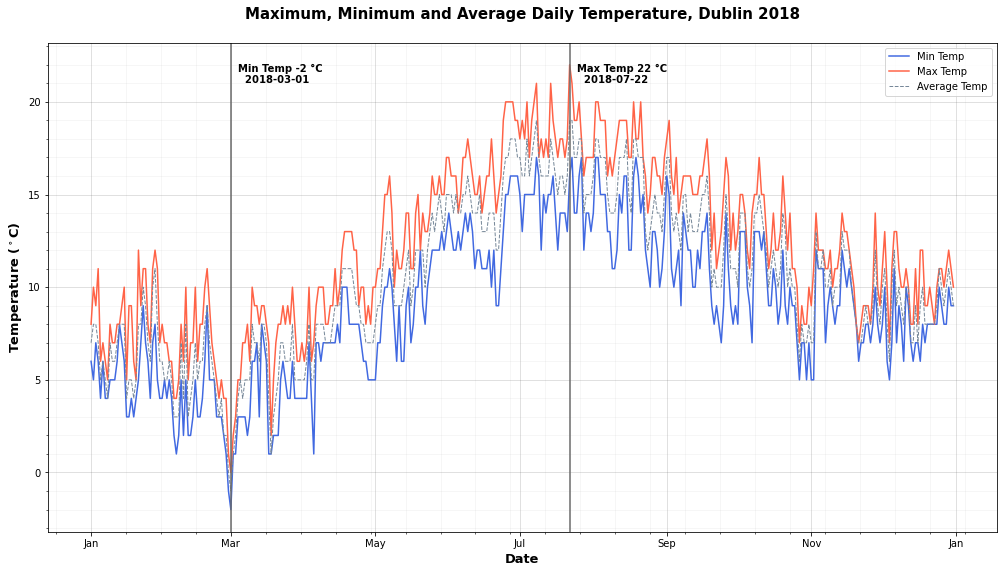

In [21]:
# Plot of Temp vs Date for Max, Min, Avg daily temp

# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 9))

# Minimum Temp
ax.plot(weatherDF["date"],
       weatherDF["mintempC"],
       color="royalblue",
       label = "Min Temp")

# Maximum Temp
ax.plot(weatherDF["date"],
       weatherDF["maxtempC"],
       color="tomato",
       label = "Max Temp")


# Average Temp
ax.plot(weatherDF["date"],
       weatherDF["avgtempC"],
       '--',  linewidth=1,
       color="lightslategrey",
       label = "Average Temp")

# Vertical lines for maximum and minimum temperatures reached
plt.axvline(maxLine, c="dimgrey")
plt.text(maxLine,21,maxLabel,fontweight='bold')

plt.axvline(minLine, c="dimgrey")
plt.text(minLine,21,minLabel,fontweight='bold')

# Set title and labels for axes
plt.xlabel(xlabel="Date", weight='bold', size = 13)
plt.ylabel(ylabel="Temperature ($^\circ$C)", weight='bold', size = 13)
plt.title("Maximum, Minimum and Average Daily Temperature, Dublin 2018\n", weight='bold', size = 15)


# Format date to display month name
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)

# Add legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(labels)

# Add grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)


plt.show()


#### Analysing the graph:

From this graph we can see the daily temperature trends for the year.
It is clear from the graph that the max temperature reached was 22°C on the 22nd July, and the min temperature reached was -2°C on the 1st of March.

We can see an upward trend in the daily temperature from April, which reaches a max in July, followed by a downward trend until November.

The coldest months are clearly January - March followed by November - December, with the warmest weather in July - September

### <font color='indianred'>Histogram of Average Daily Temperature

I constructed a histogram to visualtise the distribution of the daily average temperatures.

A histogram will reveal the shape of the distribution, its central tendency, and the spread of values, as well as identifying any outliers that may be present. 

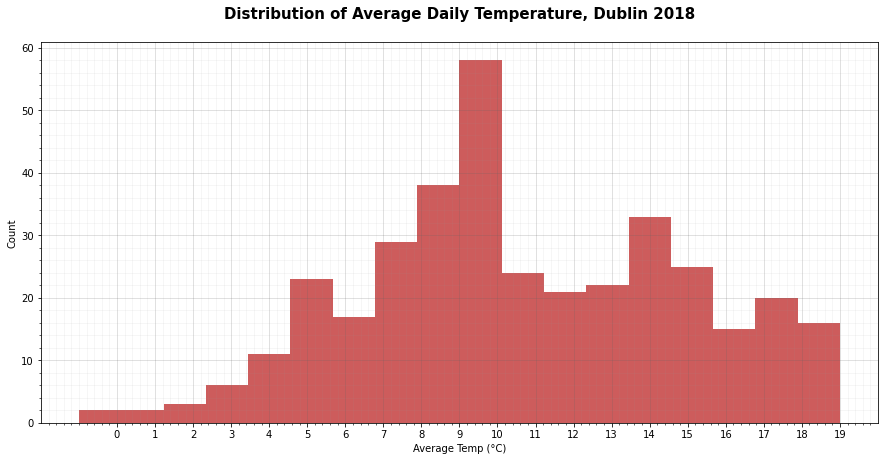

Average Daily Temperature Summary Stats (°C):


count    365.000000
mean      10.567123
std        4.221740
min       -1.000000
25%        7.000000
50%       10.000000
75%       14.000000
max       19.000000
Name: avgtempC, dtype: float64

median  10.0


In [22]:
plt.figure(figsize=(15, 7))

# construct histogram
weatherDF['avgtempC'].hist(bins = 18,color='indianred')

# labels
plt.ylabel("Count",size=10)
plt.xlabel("Average Temp (°C)",size=10)
plt.title("Distribution of Average Daily Temperature, Dublin 2018\n",size=15, fontweight="bold")

# Add grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

# ticks
plt.xticks(np.arange(0, 20, step=1))

plt.show()

print("Average Daily Temperature Summary Stats (°C):")
display(weatherDF['avgtempC'].describe())
print("median ",weatherDF['avgtempC'].median())


__Analysis__

A histogram of the average daily temperature, as well as some summary stastics can be seen above.

The distribution is roughly symmetric and the values fall between -1°C and 19°C.

There is a peak at around 9-10°C, which is very close to the  mean of 10.57°C and the median of 10°C.

The curve is approximately bell shaped, indicating a roughly normal distribution.

For a normal distribution one would expect 68% of the values to be within 1 standard deviation of the mean, and 95% within 2 sd. We can see that this is approximately true for this graph. 
The mean and sd are 10.56 and 4.22.

1 standard deviation of the mean is 6.34 - 14.78, or 6 - 15 for simplicity. 
We can see that this range makes up approximately (17+29+38+57+23+21+22+33)/365 * 100 = (240/365)*100=65%

2 standard deviations of the mean is 2.12 - 19
We can see that this range makes up approximately (6+11+23+17+29+38+57+23+21+22+33+25+15+20+16)/365 * 100 = 355/365 * 100 = 97%.

Thus, the average daily temperature is roughly normally distributed.


This graph is as expected for the temperature in Ireland. The majority of the values are between about 7 and 15°C, which would be the typical temperature in Ireland, with some less frequent highs of about 19°C, which would occur on some of the very hot days during the summer, and less frequent lows of about -1°C, which would occur occasionally in the winter months.

### <font color='indianred'>Heatmap of Hourly Temperature

Next I was interested in looking at the trends in temperature throughout the day.
    
The data in the hourlyDF dataset contains the temperature for 12AM, 3AM, 6AM, 9AM, 12PM, 2PM, 6PM, 9PM for each day of the year 2018.
To analyse this hourly data I decided to use a heat map.
    
I decided to group my data by month and time, and get the average temperature for the hours 12AM, 3AM, 6AM, 9AM, 12PM, 2PM, 6PM, 9PM for each month. I then constructed a heat map of month vs time, and the colours indice the temperature for that hour. The colours corresponding to the temperatures can be seen on the colour bar on the right hand side.

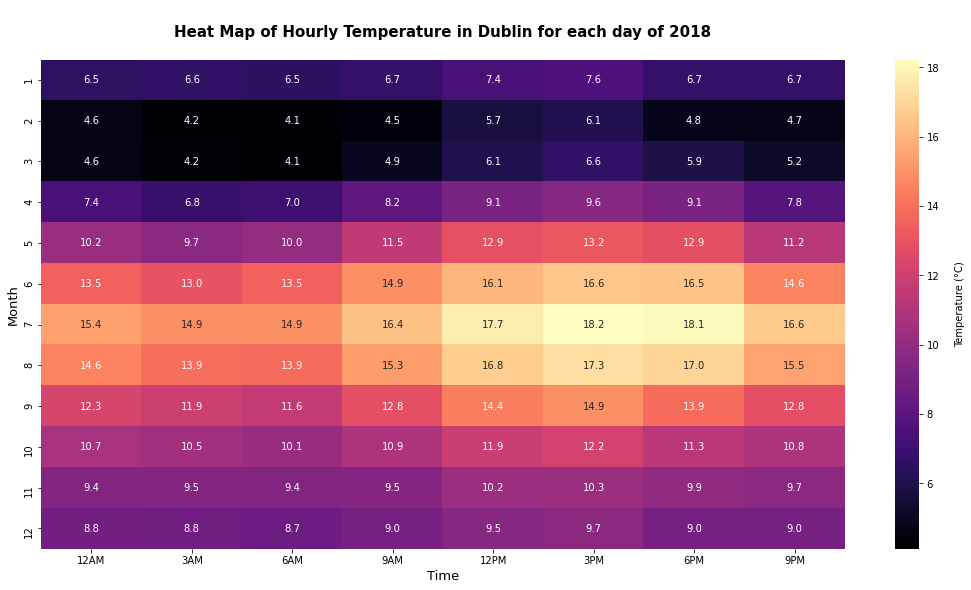

In [23]:
# set size of plot
fig, ax = plt.subplots(figsize=(18, 9))

df = hourlyDF.groupby(by=[hourlyDF["date"].dt.month, hourlyDF["time"]]).mean()

df["dateIndex"] = df.index.get_level_values(0).tolist()
df["timeIndex"] = df.index.get_level_values(1).tolist()

# data to display on heatmap - day of the year, time, tempC
data = df.pivot("dateIndex", "timeIndex","tempC")

# label x axis
x_axis_labels = ["12AM","3AM","6AM","9AM","12PM","3PM","6PM","9PM"]

ax = seab.heatmap(data, xticklabels=x_axis_labels,cmap="magma",cbar_kws={'label': "\nTemperature (°C)"}, annot=True, fmt='.1f')

plt.xlabel(xlabel="Time", size = 13)
plt.ylabel(ylabel="Month", size = 13)
x=plt.title("\nHeat Map of Hourly Temperature in Dublin for each day of 2018\n", size = 15, fontweight="bold")


__Analysis__

From the heatmap above the average change in temperature throughout the day can be seen for each month of the year. The colours indicate the temperature, with the colour bar on the right hand side showing the temperature corresponding to the colours. I also decided to display the values for the average temperatures in °C over each colour. This way, at a quick glance one can instantly see the change in temperature through the day by the change in colour, and then with a closer look can see the exact actual values. 

It is clear from the heatmap that the highest temperatures are usually between about 10:30am and 4:30pm. This can be seen by the lighter colours for these times. The value of these temperature highs varies from month to month. The lightest colours, indicating the highest temperatures, can be seen in July and August in the afternoon (around 3pm). The light yellow colour indicates temperatures of around 18°C.

For each month it is clear from the change in colours that the temperature is lower in the morning, reaches a high in the afternoon, and then is lower again into the evening.

The lowest temperatures can be seen by the very dark colours in February and March, particularly in the morning and evenings. We can see dark purple colours indicating temperatures of about 4°C at these times.

### <font color='indianred'>Heatmap of Hourly Temp with Range Slider

The heatmap above uses the monthly averages for the hours 12AM, 3AM, 6AM, 9AM, 12PM, 2PM, 6PM, 9PM to see the temperature change throughout the day. For a more accurate visualisation to see how the temperature changes throughout the day for every day of the year (i.e. not just monthly averages) I decided to construct another Heatmap for every day. The issue here is that with 365 values for the date, you would need a very large graph to be able to make out the hourly temperature changes. Because of this, I decided to use a range slider. The slider can be adjusted to show the whole year, specific months, specific days, etc.

In [24]:
import plotly.express as px

data = hourlyDF.pivot("time","date","tempC")
y_axis_labels = ["12AM","3AM","6AM","9AM","12PM","3PM","6PM","9PM"]


fig = px.imshow(data,
                labels=dict(x="Date", y="Time", color="Temperature (°C)"),
                y=y_axis_labels, color_continuous_scale='magma', 
                title="Heatmap of Hourly Temperature Dublin 2018 with Range Slider\n")
fig.update_xaxes(side="bottom")
fig.update_xaxes(rangeslider_visible=True)

fig.show()

__Analysis__


The above heatmap again shows the change in temperature throught the day (in this case with time on the y-axis), however this shows every day of the year, as opposed to monthly averages.

By adjusting the date slider using the sliders on either side, one can focus in on specifics dates, weeks, months, etc. By hovering over a date/time on the graph one can see a text box displaying the date, time and temperature. 

This graph shows a more accurate representation of the temperature changes throught the day, as it shows every day as opposed to monthly averages. For information about the temperature change throughout the day for a specific date, or for a specific month, one can easily focus in on those days using the sliders. 

As with the previous heatmap, the colours indicate the temperature, and the values corresponding to the colours are shown on the colour bar on the right hand side. The change in temperature throughout the day can be seen by the vertical colour change (horizontal in the previous heatmap).

The previous heatmap gives a more general view of the temperature change throughout the day by showing the averages, wherease this heatmap gives a more detailed view. 


## <font color='firebrick'>Precipitation

### <font color='indianred'>Line Plot of Daily Precipitation for the year

Next I was interested in analysing the precipitation for the year.

There are no daily values for precipitation in the weatherDF datafame. The hourlyDF dataframe has totals for precipitation for every 3 hours of each day. I grouped my hourly data by day and summed the precipitation for each 3 hour total to get the daily total for each day. I graphed the daily totals using a line plot with precipitation in mm vs date. The steps I performed to do so and the resulting graph are shown below

__Vertical Lines__

I wanted to add vertical lines to my graph for the day with the max precipitation for the year, as well as the few highest days of precipitation after the max. To do this I first grouped the data in hourlyDF by date. I then summed each to get the total precipitation for each day. I sorted these values into descending order (from most precipitation (mm) -> least precipitation (mm)).

I then iterated through the first 7 values in this series to get the date and precipitation for the 7 highest days of precipitation. I stored these dates and precipitation levels in the lists dateList and precipList.

In [25]:
# group the data by date
groupByDate = hourlyDF.groupby("date")

In [26]:
# sum for each date 
dailyPrecipSum = groupByDate["precipMM"].sum()
weatherDF["totalPrecipMM"] = dailyPrecipSum.tolist()

# sort in ascending order
dailyPrecipInOrder = dailyPrecipSum.sort_values(ascending=False)

print("Date & Total Daily Precipitation (in mm) in descending order\n")
print(dailyPrecipInOrder)
print("\n")

dateList=[]  # list to hold the dates with highest precip
precipList=[]  # list to hold corresponding precip values 
numLines = 7  # number of vertical lines that I want to add to my graph

for i in range (0, numLines):
    dateList.append(dailyPrecipInOrder.index[i].date())  # Date of ith highest precipitation for the year
    precipList.append(dailyPrecipInOrder[i])  # Precipitation value of ith highest precipitation for the year

print("Dates and Precipitation for the vertical lines on the graph:\n")
print("Dates:\n",dateList, "\n\nPrecipitation:\n",precipList)


Date & Total Daily Precipitation (in mm) in descending order

date
2018-10-13    11.0
2018-01-21    10.7
2018-12-15     8.3
2018-03-14     7.5
2018-04-02     7.1
2018-12-23     6.9
2018-11-08     6.8
2018-11-05     6.5
2018-04-04     6.4
2018-03-02     5.7
              ... 
2018-06-28     0.0
2018-06-27     0.0
2018-06-26     0.0
2018-06-25     0.0
2018-06-24     0.0
2018-06-23     0.0
2018-06-22     0.0
2018-06-21     0.0
2018-06-12     0.0
2018-07-02     0.0
Name: precipMM, Length: 365, dtype: float64


Dates and Precipitation for the vertical lines on the graph:

Dates:
 [datetime.date(2018, 10, 13), datetime.date(2018, 1, 21), datetime.date(2018, 12, 15), datetime.date(2018, 3, 14), datetime.date(2018, 4, 2), datetime.date(2018, 12, 23), datetime.date(2018, 11, 8)] 

Precipitation:
 [11.0, 10.7, 8.3, 7.5, 7.1000000000000005, 6.9, 6.800000000000001]


__Vertical Span__

I wanted to add a vertical span on my graph for the maximum number of consecutive days with no precipitation. I had my series dailyPrecipSum which summed the hourly precipitation for each day to get the daily totals.

This series was in order of date. I constructed the list countAndDateList to hold lists containing [count, date] which correspond to the number of consecutive days with no precipitation, and the start date of those consecutive days.

I looped through the series and for each day with no precipitation counted the number of consecutive days with no precipitation. I stored these values in countAndDateList.

I construted the dataframe consecutiveDaysNoPrecip from the counts and dates in countAndDateList and sorted it in descending order of count. Now, the first row in this DF corresponds to the start date and number of consecutive days of the biggest span with no precipitation.

I was having trouble with indexing when trying to access these values so I converted the columns to lists and took the first value in each list as my count and start date for the laergest span.

The span end date is the start date + count days.

I now have the start and end date of the largest span and can add this as a vertical span in my graph.

In [27]:
countAndDateList = []

# loop through values for daily precipitation totals
for i in range(0, len(dailyPrecipSum)):
    if dailyPrecipSum[i]==0: # if the ith day has 0mm precipitation
        count, j = 1, i # count=1, j=1
        
        while(not j == len(dailyPrecipSum)-1 and dailyPrecipSum[j+1]==0): # loop while the j+1 th day has 0mm precip
            count, j = count+1, j+1 # increment count and j
        
        # add [count,date] to the countAndDate list
        countAndDateList.append([count, dailyPrecipSum.index[i]])

# construct DF
consecutiveDaysNoPrecip = pd.DataFrame(countAndDateList, columns=["count", "date"])

# sort in descending order by count
consecutiveDaysNoPrecip = consecutiveDaysNoPrecip.sort_values(by=["count"],ascending=False)

# max is the first row
MaxDaysNoPrecipCount = consecutiveDaysNoPrecip["count"].tolist()[0]

# date of max
MaxDaysNoPrecipStart = consecutiveDaysNoPrecip["date"].tolist()[0]

# end is date of max + count days
MaxDaysNoPrecipEnd = MaxDaysNoPrecipStart + datetime.timedelta(days=int(MaxDaysNoPrecipCount))

spanLabel = "  Max number of consecutive days \n"
spanLabel += "  with no precipitation: " + str(MaxDaysNoPrecipCount) + " days"
spanLabel += "\n  " + str(MaxDaysNoPrecipStart.date()) + " - " + str(MaxDaysNoPrecipEnd.date())

print("Largest span of consecutive days with no precipitation.\n")
print("Start Date: ", MaxDaysNoPrecipStart.date())
print("End Date: ", MaxDaysNoPrecipEnd.date())
print("Number of days in span: ", MaxDaysNoPrecipCount)


Largest span of consecutive days with no precipitation.

Start Date:  2018-06-21
End Date:  2018-07-04
Number of days in span:  13


__Construct Graph__

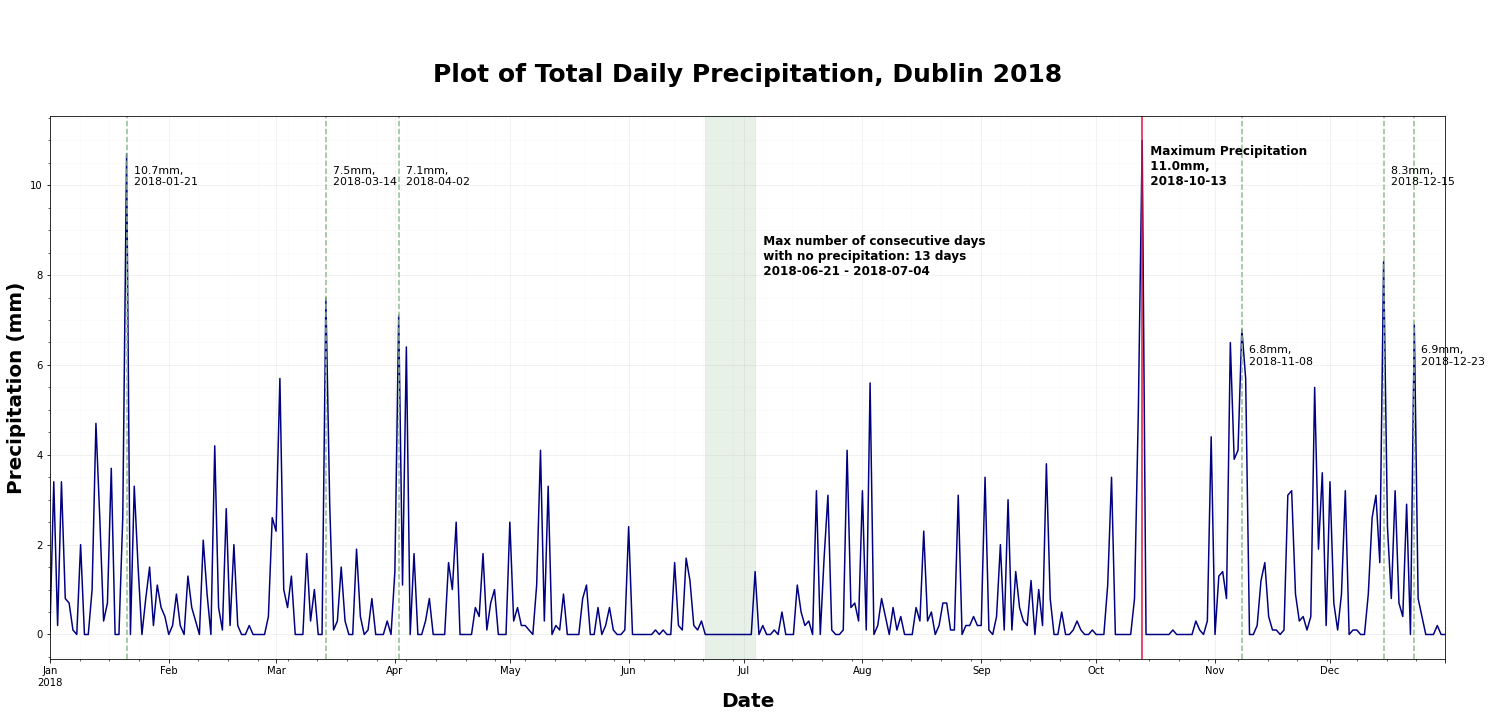

In [28]:
fig, ax = plt.subplots(figsize=(25,10))

# plot precipitation for the sum of the data grouped by date
groupByDate.sum()["precipMM"].plot(ax=ax, color="navy")

# Set title and labels for axes
plt.xlabel(xlabel="Date", weight='bold', size = 20)
plt.ylabel(ylabel="Precipitation (mm)", weight='bold', size = 20)
plt.title("\n\nPlot of Total Daily Precipitation, Dublin 2018\n", weight='bold', size = 25)


# add vertical span
ax.axvspan(MaxDaysNoPrecipStart, MaxDaysNoPrecipEnd, alpha=0.2, color="darkseagreen", label = spanLabel)
plt.text(MaxDaysNoPrecipEnd,8,spanLabel, fontweight='bold', size = 12)


# add vertical line for the highest precipitation reached for the year
maxPrecipLabel = "  Maximum Precipitation\n  " + str(precipList[0]) + "mm,\n  " + str(dateList[0])
plt.axvline(dateList[0], c="crimson")
plt.text(dateList[0],10,maxPrecipLabel,fontweight='bold', size = 12)


# # plot a few other lines for days of high precipitation levels
for i in range(1, numLines):
    precipLabel = "  " + str(round(precipList[i], 3)) + "mm,\n  " + str(dateList[i])
    plt.axvline(dateList[i], c="darkseagreen", linestyle='dashed')
    if(i>4):plt.text(dateList[i],6,precipLabel, size = 11)
    else:plt.text(dateList[i],10,precipLabel, size = 11)
        
        
# Add grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.1)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.05)        


plt.show()

__Anlysing the graph__

The graph above shows the daily precipitation totals for the year 2018.

Precipitation in mm is on the y axis, and the dates, labelled by the months, are on the x axis.

This graph shows the change in percipitation throughout the year, as well as clearly showing some of the highest values of precipitation, as well as the lonhgest span with no precipitation.

The day with the highest value for precipitation can be seen by the red line. The highest value was on the 12th of October and was 11mm.

The next 6th highest values for precipitation reached can be seen by the dotted lines. Highest precipitation levels can be seen mostly in the months January - April and October - December. The drier months are May - September. This can be seen by the lower values in these months. None of the 7 highest values for precipitation which are shown on the graph occured during these months.


The longest span of days with no precipitation can be seen by the green vertical span. As shown in the graph, this span lasted 13 days from the 21st of June to the 4th of July.

This graph gives a general overview of the daily precipitation in Dublin for the year 2018.

### <font color='indianred'>Histogram of Total Daily Precipitation
    
    
I constructed a histogram to visualtise the distribution of the daily average precipitation.

A histogram will reveal the shape of the distribution and the spread of values, as well as identifying any outliers that may be present. 

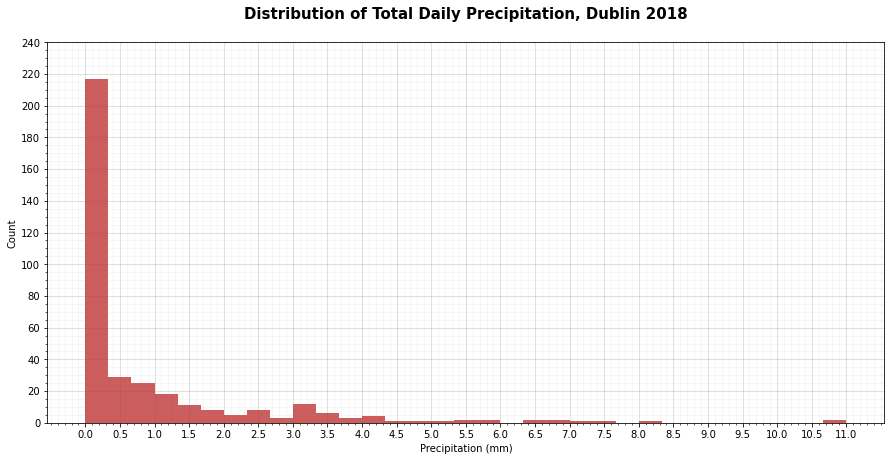

Average Total Daily Precipitation Summary Stats (°C):


count    365.000000
mean       0.914795
std        1.639904
min        0.000000
25%        0.000000
50%        0.200000
75%        1.000000
max       11.000000
Name: totalPrecipMM, dtype: float64

median  0.2


In [29]:
plt.figure(figsize=(15, 7))
weatherDF['totalPrecipMM']=groupByDate.sum()["precipMM"].tolist()

# construct histogram
weatherDF['totalPrecipMM'].hist(bins = 33,color='indianred')

# ticks
plt.yticks(np.arange(0, 250, step=20))
plt.xticks(np.arange(0, 11.5, step=0.5))

# labels
plt.ylabel("Count",size=10)
plt.xlabel("Precipitation (mm)",size=10)
plt.title("Distribution of Total Daily Precipitation, Dublin 2018\n",size=15, fontweight="bold")

# Grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

plt.show()

# print summary stats
print("Average Total Daily Precipitation Summary Stats (°C):")
display(weatherDF['totalPrecipMM'].describe())
print("median ",weatherDF['totalPrecipMM'].median())

The histogram above is clearly skewed to the right, meaning that the mean is larger than the median, as seen in the summary statistics. Approximately 60% (216/365  * 100) of the precipitation values are between the minimum value of 0mm and 0.375mm. An outlier can be seen at 11mm. 

## <font color='firebrick'>Temperature & Precipitation
### <font color='indianred'>Scatter Plot of Average Daily Temperature and Total Precipitation

Next, I was interested in looking the relationship between temperature and precipitation. From my graph above of daily precipitation for the year, it was clear that the highest precipitation levels occured in the months of January - April and October - December, the colder months of the year, with much less daily precipitation in the warmer summer months. This led me to wonder what kind of relationship exists between temperature and precipitation. I predicted that there may be a negative correlation between temperature and precipitation.

To visualise this relationship I constructed a scatter plot of average daily temperature and total daily precipitation. I also calculated the correlation coefficient to put a numeric value on this relationship.

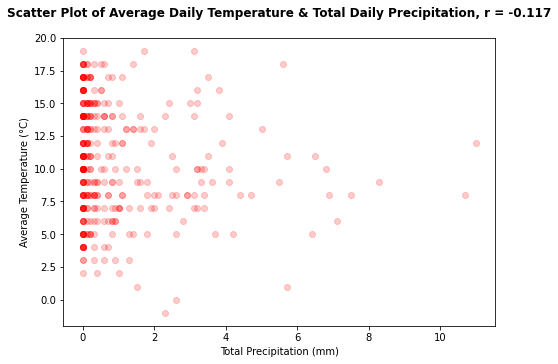


Correlation between Average Daily Temperature & Total Daily Precipitation, r =  -0.117



In [30]:

# weatherDF["totalPrecipMM"] from the construction of the previous graph above
# correlation between total precip and average temp
correlation = weatherDF["totalPrecipMM"].corr(weatherDF["avgtempC"])

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

# construct scatter plot, set transparency to 0.2
ax.scatter(weatherDF["totalPrecipMM"], weatherDF["avgtempC"], color='r', alpha=0.2)

# labels and title
ax.set_ylabel('Average Temperature (°C)')
ax.set_xlabel('Total Precipitation (mm)')

title = 'Scatter Plot of Average Daily Temperature & Total Daily Precipitation, r = ' +  str(correlation.round(3)) + "\n"
ax.set_title(title, fontweight="bold")
plt.show()
print("\nCorrelation between Average Daily Temperature & Total Daily Precipitation, r = ", str(correlation.round(3)) + "\n")

__Analysis__

It is clear from the scatter plot above that the relationship between temperature and precipitation is weak. The correlation coefficient is -0.117 which shows a weak negative correlation.

This weak correlation is expected for temperature and precipitation in Ireland. As seen in the previous line plot of daily precipitation, although the days of highest precipitation levels were mostly in the colder months, it still rained consistently throughout the summer too, with only slightly lower precipitation levels. This would indicate a weak negative correlation.


The scatter plot can be shown again below fit with a line of best fit.

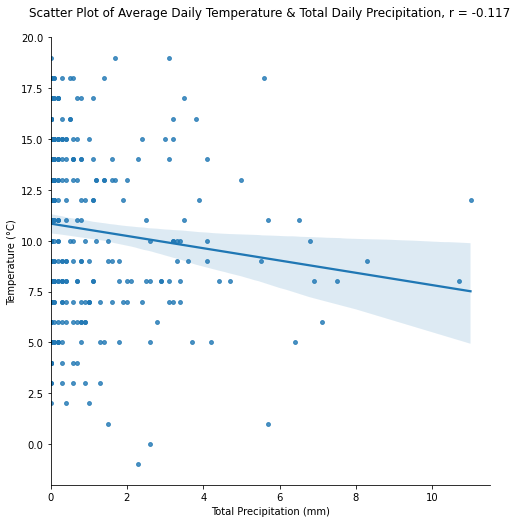

In [31]:
z = seab.lmplot(x='totalPrecipMM',y='avgtempC',data=weatherDF,fit_reg=True,  scatter_kws={"s": 15}, height=7)
z = z.set(xlim=(0, 11.5), ylabel="Temperature (°C)", xlabel = "Total Precipitation (mm)", title=title)

The slope of the line of best fit indicates a weak negative linear relationship. This is expected and is in line with the correlation coefficient of -0.117

## <font color='firebrick'>Cloud Cover

### <font color='indianred'>Histogram of Average Daily Cloud Cover
    
To visualtise the distribution of cloud cover I constructed a histogram of the average daily cloud cover percentages.

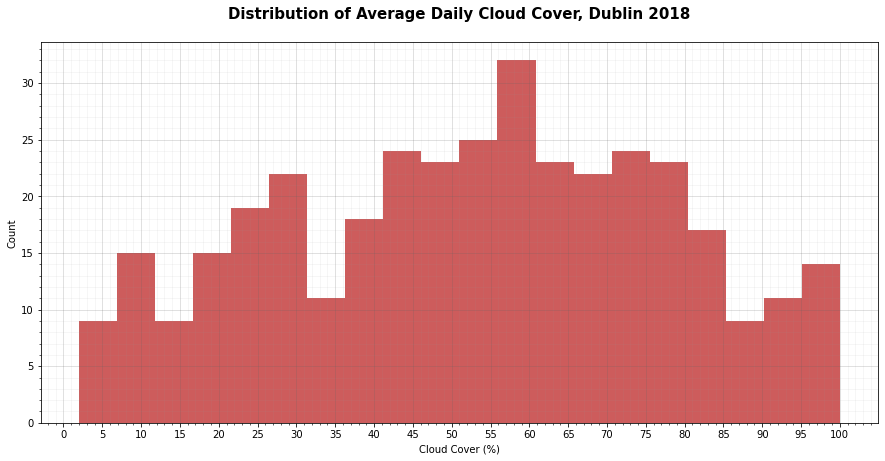

Average Daily Cloud Cover (%) Summary Stats:


count    365.000000
mean      52.603425
std       24.797444
min        2.000000
25%       31.875000
50%       53.750000
75%       71.875000
max      100.000000
Name: avgCloudCover, dtype: float64

median  53.75


In [32]:
plt.figure(figsize=(15, 7))

# average daily cloud cover
weatherDF["avgCloudCover"] = groupByDate["cloudcover"].mean().tolist()

# construct histogram
weatherDF['avgCloudCover'].hist(bins = 20,color='indianred')

# labels
plt.ylabel("Count",size=10)
plt.xlabel("Cloud Cover (%)",size=10)
plt.title("Distribution of Average Daily Cloud Cover, Dublin 2018\n",size=15, fontweight="bold")

# Add grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

# ticks
plt.xticks(np.arange(0, 105, step=5))

plt.show()

print("Average Daily Cloud Cover (%) Summary Stats:")
display(weatherDF['avgCloudCover'].describe())
print("median ",weatherDF['avgCloudCover'].median())

__Analysis__

The histogram above shows the distribution of average daily cloud cover percentage. There is a peak at 55-60% which makes up about 9% of the values, and a peak at 25-30% which makes up about 6% of the values. These two peaks indicate a bimodal distribution. The distribution around the second peak is approximately normal, indicated by the bell shaped curve. The distribution around the first peak is skewed to the left.

### <font color='indianred'>Histograms of Hourly Cloud Cover

The above histogram shows the distribution of the daily average cloud cover. To see if there was any difference in the distribution of cloud cover throughout the day I decided to compute histograms of the cloud cover for each hour. These histograms use the actual hourly values, as opposed to averages like the previous histogram.

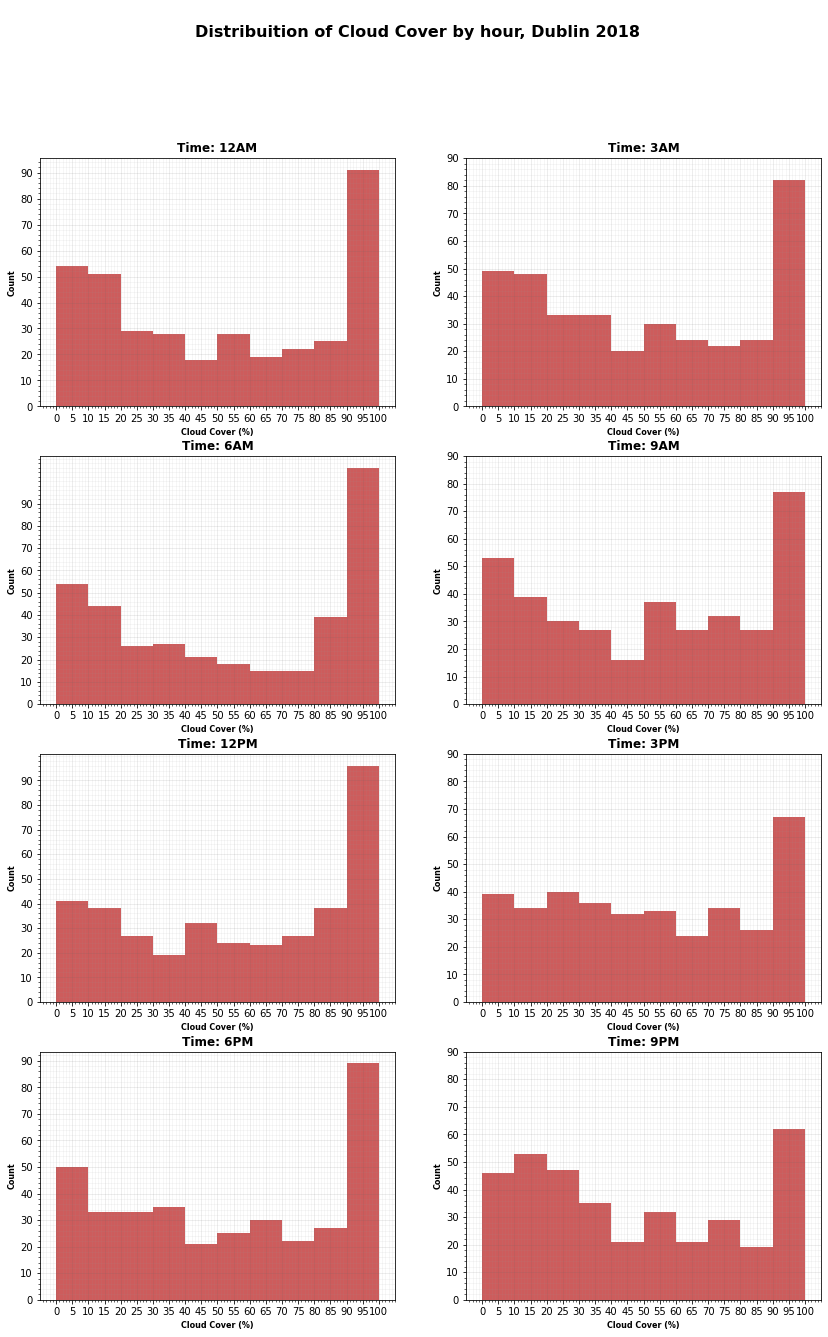

Cloud Cover Stats by Hour:

           mean        std   25%   50%   75%
time                                        
0     51.704110  35.798277  17.0  50.0  89.0
300   51.112329  34.364337  18.0  49.0  85.0
600   55.504110  36.871295  17.0  58.0  94.0
900   52.515068  34.114995  19.0  54.0  83.0
1200  57.326027  34.407712  24.0  61.0  91.0
1500  51.898630  32.153873  23.0  50.0  80.0
1800  53.482192  34.403597  22.0  53.0  89.0
2100  47.284932  33.099184  18.0  40.0  76.0 

      median
 time
0       50
300     49
600     58
900     54
1200    61
1500    50
1800    53
2100    40
Name: cloudcover, dtype: int64


In [33]:
# group cloud cover by time
groupByTime = hourlyDF.groupby("time")
groupCloudCoverByTime = groupByTime["cloudcover"].apply(list)

# 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(14, 21))
fig.suptitle('\nDistribuition of Cloud Cover by hour, Dublin 2018', fontsize=16, fontweight="bold")
ax = axes.flatten()


# labels
labels = ["12AM","3AM","6AM","9AM","12PM","3PM","6PM","9PM"]

i=0 # counter
for time in groupCloudCoverByTime.index: # for each 'time'
    # construct histogram
    ax[i].hist(groupCloudCoverByTime[time],bins=10, color='indianred', label="time")
    
    # title, labels
    title = "\nTime: " + labels[i]
    ax[i].set_title(title, size=12, fontweight="bold")
    ax[i].set_ylabel('Count', size=8, fontweight="bold")
    ax[i].set_xlabel('Cloud Cover (%)',size=8, fontweight="bold")
    
    # ticks, grid lines
    ax[i].set_xticks(np.arange(0, 105, step=5))
    ax[i].set_yticks(np.arange(0, 100, step=10))
    ax[i].grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.15)
    ax[i].minorticks_on()
    ax[i].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
    # increment counter
    i+=1
plt.show()

# print stats
print("Cloud Cover Stats by Hour:\n")
print(groupByTime["cloudcover"].describe()[["mean","std","25%","50%","75%"]],"\n\n      median\n",groupByTime["cloudcover"].median())

__Analysis__

It is immediately obvious that the distribution of cloud cover percentage does not vary much for each hour. The shape of the distribution for each hour is very similar, with a peak at 90-100%, and often a peak at 0-10%.

### <font color='indianred'>Histograms of Hourly Cloud Cover by Month

The above histograms show the distribution of the daily average cloud cover, and of hourly cloud cover for each hour. It is clear that the time of the day does not affect the distribution of cloud cover hugely. Next I was interested in seeing if the time of year affected the distribution. I decided to construct histograms of the distribution of cloud cover for each month. The data I decided to use for this was the hourly values for cloud cover, as it is clear from above that the time of day does not greatly affect the distribution.

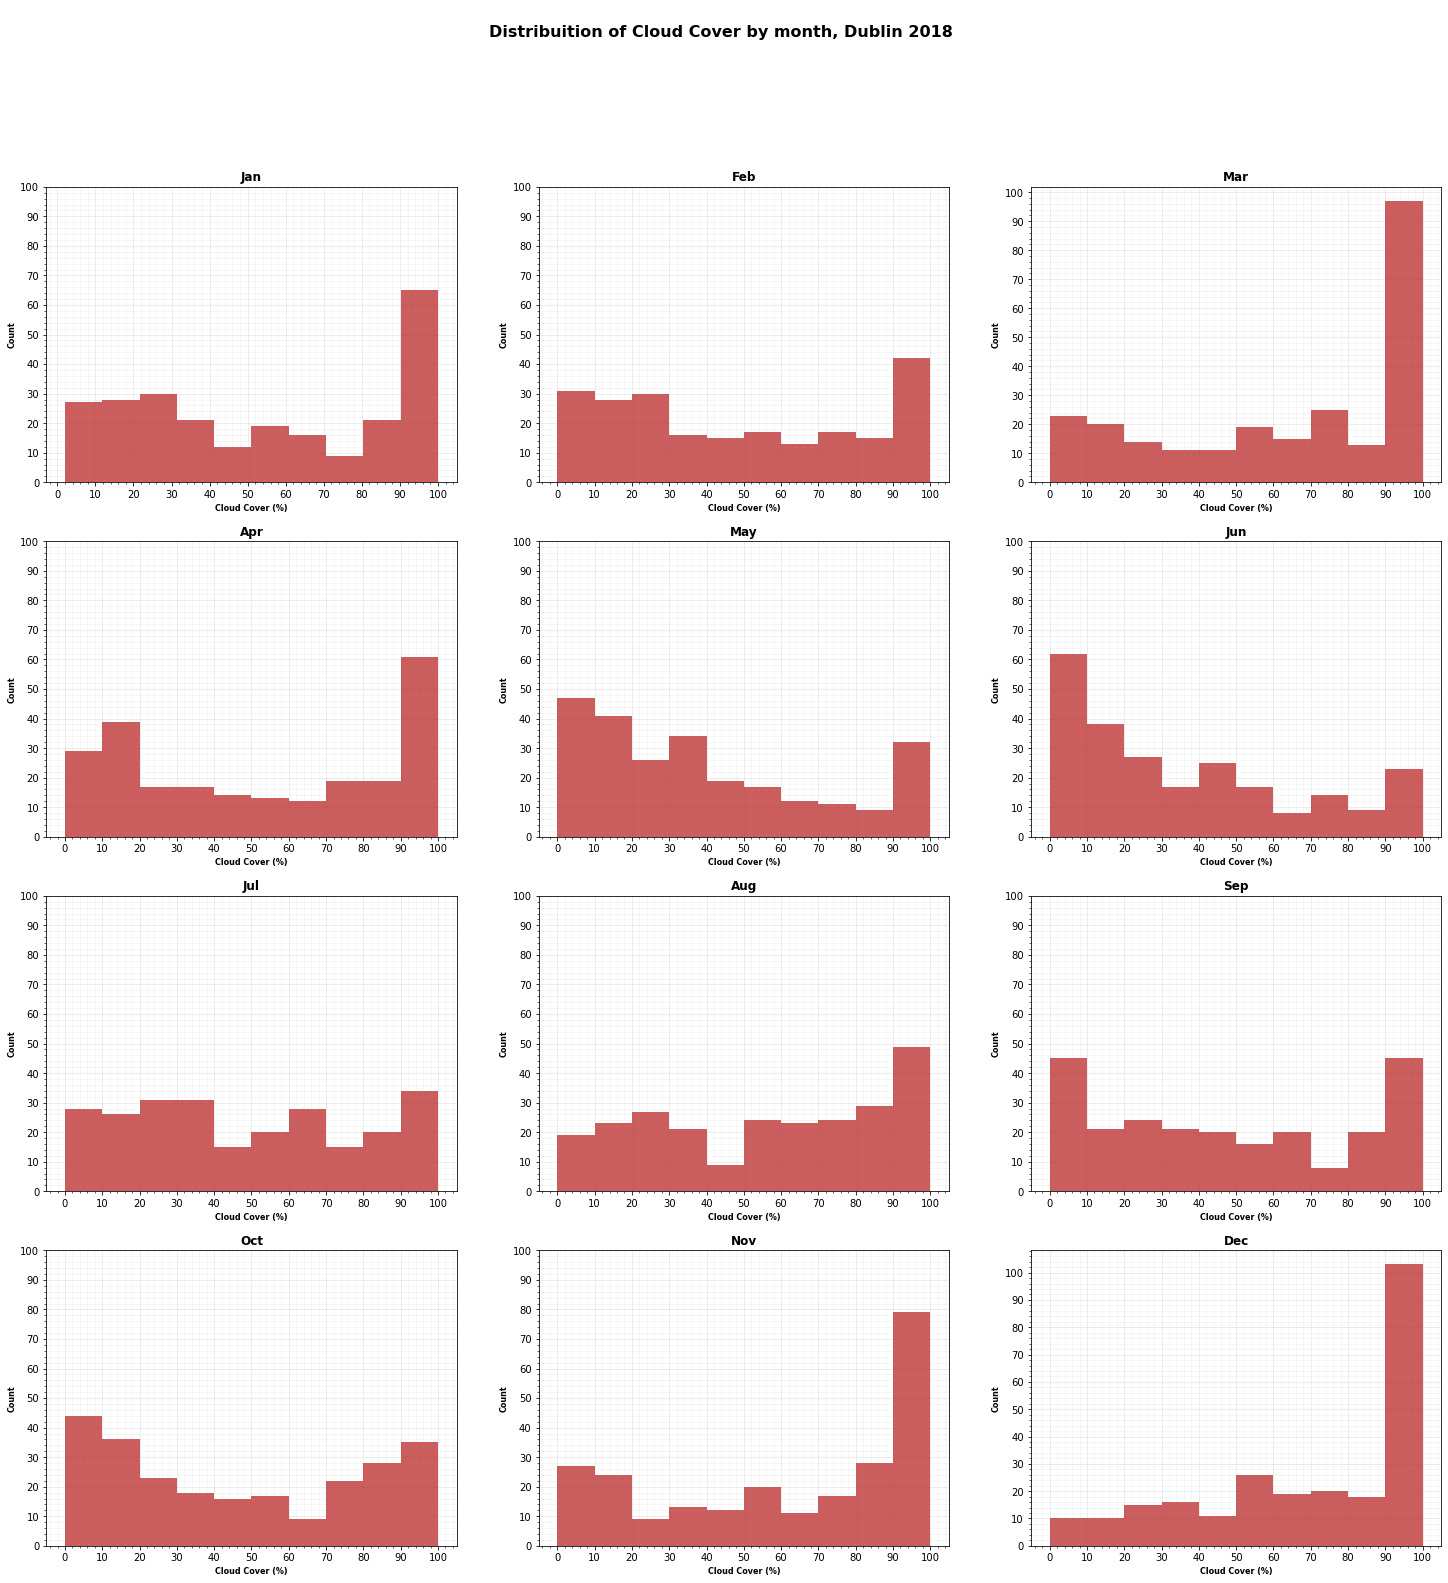

Cloud Cover Stats by Month:

           mean        std    25%   50%     75%
date                                           
1     55.677419  34.338290  24.75  54.5   92.00
2     48.750000  33.800390  18.75  45.5   81.00
3     65.379032  34.608181  33.00  75.0  100.00
4     53.370833  35.821267  16.75  51.0   90.25
5     39.995968  31.656749  13.00  33.5   61.00
6     35.845833  30.894699   9.00  26.0   58.00
7     48.282258  30.942564  22.00  45.5   76.00
8     56.278226  31.772968  26.75  60.5   85.00
9     48.070833  33.956272  17.00  45.5   81.00
10    46.197581  34.167563  13.75  41.5   80.25
11    62.208333  35.202913  32.00  73.0   99.00
12    70.459677  30.333610  49.75  77.5  100.00 

     median
 date
1     54.5
2     45.5
3     75.0
4     51.0
5     33.5
6     26.0
7     45.5
8     60.5
9     45.5
10    41.5
11    73.0
12    77.5
Name: cloudcover, dtype: float64


In [34]:
# group cloud cover by month
groupByMonth = hourlyDF.groupby(hourlyDF["date"].dt.month)
groupCloudCoverByMonth = groupByMonth["cloudcover"].apply(list)

# 4 rows and 2 columns
fig, axes = plt.subplots(4, 3, figsize=(25, 25))
fig.suptitle('\nDistribuition of Cloud Cover by month, Dublin 2018', fontsize=16, fontweight="bold")
ax = axes.flatten()

i=0 # counter
for month in groupCloudCoverByMonth.index: # for each month
    # construct histogram
    ax[i].hist(groupCloudCoverByMonth[month],bins=10, color='indianred', label="time")
    
    # title, labels
    title = str(calendar.month_abbr[month])
    ax[i].set_title(title, size=12, fontweight="bold")
    ax[i].set_ylabel('Count', size=8, fontweight="bold")
    ax[i].set_xlabel('Cloud Cover (%)',size=8, fontweight="bold")
    
    # ticks, grid lines
    ax[i].set_xticks(np.arange(0, 105, step=10))
    ax[i].set_yticks(np.arange(0, 110, step=10))
    ax[i].grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.15)
    ax[i].minorticks_on()
    ax[i].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
    i+=1 # incremement counter
plt.show()

 
# print stats
print("Cloud Cover Stats by Month:\n")
print(groupByMonth["cloudcover"].describe()[["mean","std","25%","50%","75%"]],"\n\n     median\n",groupByMonth["cloudcover"].median())

__Analysis__

Above are histograms of the hourly cloud cover for each month of the year.

In the early months of the year, from January to April, large peaks can be seen in the high percentages for cloud cover %, between 90-100%, with small peaks between 0 and 30%, and relatively uniform distribution for the rest of the values. We can see that 90-100% cloud cover makes up about 26% of cloud cover in January, 18% in February, 39% in March and 25% in April. In May the data is skewed to the right, with a peak at 0-10%, which makes up about 18% of cloud cover, and a peak at 90-100% which makes up 12%. Similarly, the data is skewed to the right in June with 0-10% cloud cover making up about 25% of cloud cover. In July, August and September, the distribution is relatively uniform, with small peaks at 90-100% in August and September, and a peak at 0-10% in September. The distribution in October could be said to be bimodal, with a peak at 0-10%, a gradual decline/skew to the right, followed by a gradual incline to a peak at 90-100%. Similar to the earlier months of the year, November and Decmber have a high peak at 90-100%, with 90-100% cloud cover % making up 33% of cloud cover in November and 42% in December.

So we can conclude that the highest cloud cover percentages of 90-100% were the most common values in the Months of January-April and November-December. During the middle of the year we typically saw a lot more lower values for cloud cover %.

## <font color='firebrick'>Cloud Cover & Precipitation

### <font color='indianred'>Scatter Plot of Daily Average Cloud Cover & Total Precipitation

Next I studied the relationship between cloud cover and precipitation in my data.

I know that rain is formed when the water droplets in clouds become too heavy to stay suspended in the clouds, and so fall to the earth as rain (or in some cases snow, sleet etc). Because of this, I predicted that there may be a considerable relationship between cloud cover and precipitation. I decided to analyse the daily average cloud cover (%) and total rainfall (mm), and predicted a positive correlation between them. That is, higher cloud cover % <=> higher precipitation levels.

To visualise this relationship I constructed a scatter plot, and then to put a numeric value on the relationship I calculated the correlation coefficient.

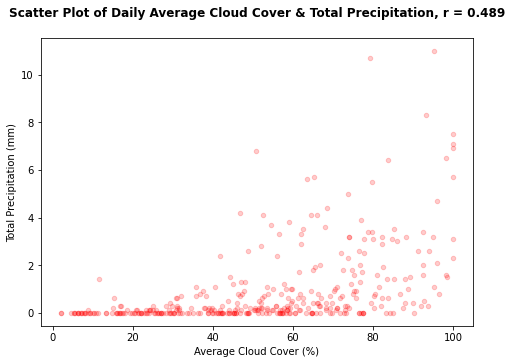

Correlation between Average Daily Cloud Cover & Total Precipitation, r =  0.489



In [35]:


# correlation between daily avg cloud cover and precip
correlation = weatherDF["avgCloudCover"].corr(weatherDF["totalPrecipMM"])

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

# construct scatter plot
ax.scatter(weatherDF["avgCloudCover"],weatherDF["totalPrecipMM"], color='r', alpha=0.2, s = 20)

# title and labels
ax.set_xlabel('Average Cloud Cover (%)')
ax.set_ylabel('Total Precipitation (mm)')
title = 'Scatter Plot of Daily Average Cloud Cover & Total Precipitation, r = ' +  str(correlation.round(3)) + "\n"
ax.set_title(title, fontweight = "bold")

plt.show()

# print correlation
print("Correlation between Average Daily Cloud Cover & Total Precipitation, r = ", str(correlation.round(3)) + "\n")


__Analysis__

It is immediately clear from the scatter plot above that there is a positive relationship between the total daily precipitation and cloud cover. 

For the days with little to no precipitation (< 1 mm) the average cloud cover can be seen to be typically between 5% and 60%, which does not tell us much about the relationship between the two variables.

For higher levels of precipitation, however, we can clearly see a positive relationship. The highest value for precipitation, which can be seen from the graph to be around 11mm, can be seen to have a value for cloud cover of over 90%. Many of the values for precipitation of 2-6 cm can be seen to have values for cloud cover of typicaly 50-100%. This would indicate that that the higher valuse for precipitation tend to have higher values for cloud cover.

It is clear, however, that this positive relationship is not very strong. There are a considerable amount of values for precipitation which are quite low, between 0 and 2 mm, with values for cloud cover of over 80%. So although almost all of values for high precipitation levels (> 4mm) have high values for cloud cover, many of the lower values for precipitation also have high values for cloud cover.

To put a numeric value on this relationship I calculated the correlation coefficient. The correlation coefficient is r = 0.489. This indicates a weak positive linear relationship.

The scatter plot can be see again below fit with a line of best fit.

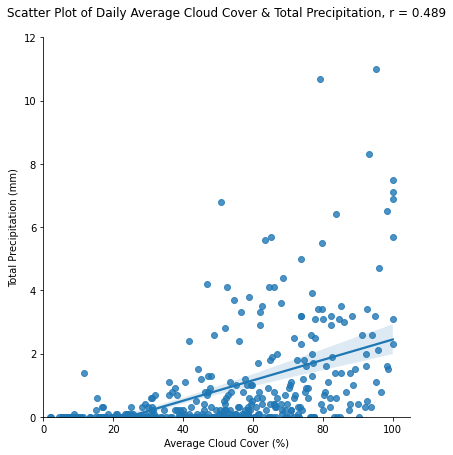

In [36]:
x=seab.lmplot(x='avgCloudCover',y='totalPrecipMM',data=weatherDF,fit_reg=True, height=6)
x = x.set(ylim=(0, 12), xlim=(0, 105))
x = x.set(xlabel="Average Cloud Cover (%)", ylabel = "Total Precipitation (mm)", title=title)

The line of best fit indicates a positive linear relationship. The slope of the line indicates that this positive relationship is not very strong. This is expected, and is in line with the correlation coefficient of 0.489.

## <font color='firebrick'>Sunrise & Sunset

### <font color='indianred'>Lineplot of daily Sunrise & Sunset

Next I decided to look at the changes is sunrise and sunset times throughout the year 2018. To do this I constructed a lineplot of time vs date, and plotted the daily sunrise and sunset times. 

My prediction was that the sunrise time would be latest in the early winter months of the year and gradually get earlier until mid summer before gradualy becoming later again into the winter.I predicted that the sunset would be earlier at the start of the year, gradually getting later into the summer, before becoming earlier again gradually into the late winter months.

I also decided to plot the the longest and shortest days of the year. To do this I calculated the daylight hours for each day, which is sunset - sunrise. I predicted that the longest day would be in the middle of the year, around June/July, and that the shortest day would be some time in the winter, possibly January, or November/December.

__Calculate daylight hours for each day__

In [37]:
# method to subtract minutes from a given time
def subtract_minutes(time, minutes):
    return (datetime.datetime.combine(datetime.date.today(), time) - minutes).time()

# list to hold the daily daylight hours
daylightHours = []

# loop through each day
for i in range(0, len(weatherDF)):
    set = weatherDF.iloc[i]["sunset"] # sunset time
    rise = weatherDF.iloc[i]["sunrise"] # sunrise time
    minutes = (60*rise.hour) + rise.minute  # number of minutes from 00:00 -> sunrise time

                                            # daylight hours = sunset - sunrise minutes
                                            # add to daylight hours list
    daylightHours.append(subtract_minutes(set, datetime.timedelta(minutes=minutes)))
    
weatherDF["daylightHours"] = daylightHours  # add column to weatherDF

# print example sunrise, sunset, daylight hours from my data
print("Sunrise & Sunset for ", weatherDF.iloc[0]["date"].date(), "\n")
print("Sunrise: ", weatherDF.iloc[0]["sunrise"])
print("Sunset: ", weatherDF.iloc[0]["sunset"])
print("Total daylight hours: ",daylightHours[0], "  (hours:minutes)")

Sunrise & Sunset for  2018-01-01 

Sunrise:  08:40:00
Sunset:  16:17:00
Total daylight hours:  07:37:00   (hours:minutes)


__Max & Min Daylight Hours - Longest & Shortest Days__

In [38]:

# covert daylight hours to int for comparison, store in temp
temp = weatherDF['daylightHours'].apply(lambda x: str(x.hour) + str(x.minute) if x.minute >= 10 else str(x.hour) + str(x.minute) + "0").astype(int)

# Max daylight hours

# index of max
maxIndex = temp.idxmax()

# Print date, sunrise and sunset and daylight hours of max
print("Maximum daylight hours reached:\n")
print("Date: ", weatherDF.iloc[maxIndex]["date"].date())
print("Daylight Hours: ",weatherDF.iloc[maxIndex]["daylightHours"].hour)
print("Sunrise: ", weatherDF.iloc[maxIndex]["sunrise"])
print("Sunset: ", weatherDF.iloc[maxIndex]["sunset"])

# store date, sunrise and sunset of max
maxHoursLine = weatherDF.iloc[maxIndex]["date"]
maxHoursRise = weatherDF.iloc[maxIndex]["sunrise"]
maxHoursSet = weatherDF.iloc[maxIndex]["sunset"]

# label for max daylight hours
maxHoursLabel = "  " + "Max daylight hours\n"
maxHoursLabel += "  " + str(weatherDF.iloc[maxIndex]["daylightHours"]) + " hours\n"
maxHoursLabel += "  " + str(weatherDF.iloc[maxIndex]["date"].date())
maxHoursLabel += "\n  " + "Sunrise: " + str(maxHoursRise) + "\n  Sunset: " + str(maxHoursSet)

# y-position of label
maxLabelY = subtract_minutes(maxHoursSet, datetime.timedelta(minutes=220))

# -------------------------------------

# Min daylight hours
minIndex = temp.idxmin()

# Print date, sunrise and sunset and daylight hours of min
print("Minimum daylight hours reached:\n")
print("Date: ", weatherDF.iloc[minIndex]["date"].date())
print("Daylight Hours: ",weatherDF.iloc[minIndex]["daylightHours"].hour)
print("Sunrise: ", weatherDF.iloc[minIndex]["sunrise"])
print("Sunset: ", weatherDF.iloc[minIndex]["sunset"])


# # store date, sunrise and sunset of min
minHoursLine = weatherDF.iloc[minIndex]["date"]
minHoursRise = weatherDF.iloc[minIndex]["sunrise"]
minHoursSet = weatherDF.iloc[minIndex]["sunset"]

# label for min daylight hours
minHoursLabel = "    " + "Min daylight hours\n"
minHoursLabel += "    " + str(weatherDF.iloc[minIndex]["daylightHours"]) + " hours\n"
minHoursLabel += "    " + str(weatherDF.iloc[minIndex]["date"].date())
minHoursLabel += "\n    " + "Sunrise: " + str(minHoursRise) + "\n    Sunset: " + str(minHoursSet)

# y-position of label
minLabelY = subtract_minutes(minHoursSet, datetime.timedelta(minutes=220))


Maximum daylight hours reached:

Date:  2018-06-17
Daylight Hours:  17
Sunrise:  03:56:00
Sunset:  20:56:00
Minimum daylight hours reached:

Date:  2018-12-19
Daylight Hours:  7
Sunrise:  08:37:00
Sunset:  16:07:00


__Note on max and min daylight hours:__

The max number of daylight hours, 15 hours, occurred on 7 consecutive days from 17th June - 23rd June. For simplicity I just showed the first of these dates as the date having the max daylight hours.

The longest day of the year technically is the summer solstic, the 21st June.

Similarly for the minimum daylight hours, the min of 7 hours 30 minutes occured every day from the 19rh - 23rd December. For simlicity again I took the first of these dates, however the winter solstice was on the 21st December.

In [39]:
print("7 consecutive days with max daylight hours:\n")
print(weatherDF[166:175][["date","daylightHours", "sunrise", "sunset"]])

print("\n5 consecutive days with min daylight hours:\n")
print(weatherDF[351:358][["date","daylightHours", "sunrise", "sunset"]])


7 consecutive days with max daylight hours:

          date daylightHours   sunrise    sunset
166 2018-06-16      16:59:00  03:56:00  20:55:00
167 2018-06-17      17:00:00  03:56:00  20:56:00
168 2018-06-18      17:00:00  03:56:00  20:56:00
169 2018-06-19      17:00:00  03:56:00  20:56:00
170 2018-06-20      17:00:00  03:57:00  20:57:00
171 2018-06-21      17:00:00  03:57:00  20:57:00
172 2018-06-22      17:00:00  03:57:00  20:57:00
173 2018-06-23      17:00:00  03:57:00  20:57:00
174 2018-06-24      16:59:00  03:58:00  20:57:00

5 consecutive days with min daylight hours:

          date daylightHours   sunrise    sunset
351 2018-12-18      07:31:00  08:36:00  16:07:00
352 2018-12-19      07:30:00  08:37:00  16:07:00
353 2018-12-20      07:30:00  08:37:00  16:07:00
354 2018-12-21      07:30:00  08:38:00  16:08:00
355 2018-12-22      07:30:00  08:38:00  16:08:00
356 2018-12-23      07:30:00  08:39:00  16:09:00
357 2018-12-24      07:31:00  08:39:00  16:10:00


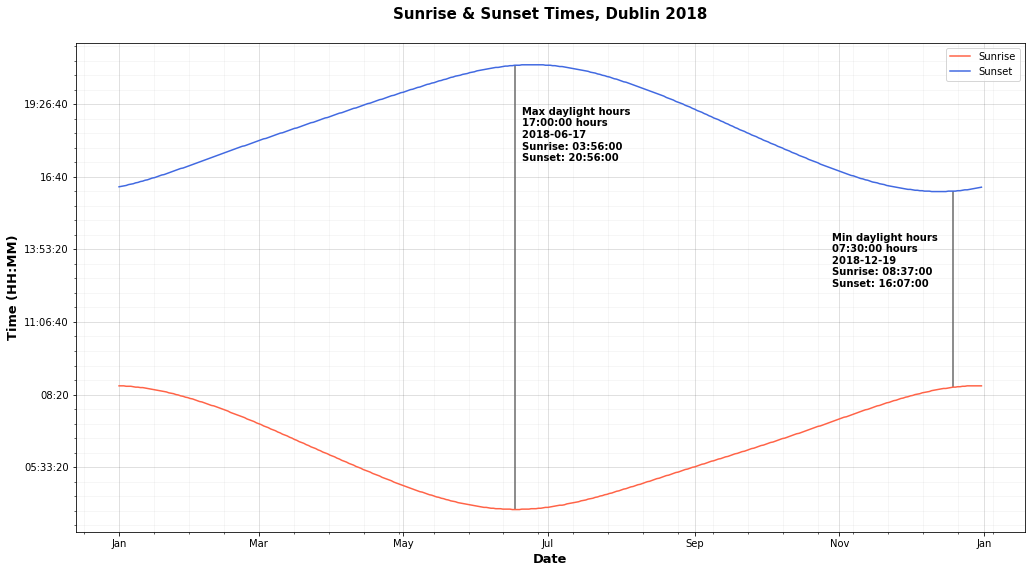

In [40]:
# Plot of Date vs Time for Sunset and Sunrise hours
pd.plotting.register_matplotlib_converters()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 9))

# Sunrise Line
ax.plot(weatherDF["date"],
       weatherDF["sunrise"],
       color="tomato",
       label = "Sunrise")

# Sunset Line
ax.plot(weatherDF["date"],
       weatherDF["sunset"],
       color="royalblue",
       label = "Sunset")

# Add legend to show sunrise and sunset lines
handles, labels = ax.get_legend_handles_labels()
plt.legend(labels)

# Vertical line and label for maximum daylight hours
plt.vlines(x=maxHoursLine, ymin=maxHoursRise, ymax=maxHoursSet, color='dimgrey', zorder=2)
plt.text(maxHoursLine,maxLabelY,maxHoursLabel, weight='bold')

# Vertical line and label for minimum daylight hours
plt.vlines(x=minHoursLine, ymin=minHoursRise, ymax=minHoursSet, color='dimgrey', zorder=2)
plt.text(weatherDF.iloc[295]["date"],minLabelY,minHoursLabel, weight='bold')

# Set title and labels for axes
plt.xlabel(xlabel="Date", weight='bold', size = 13)
plt.ylabel(ylabel="Time (HH:MM)", weight='bold', size = 13)
plt.title("Sunrise & Sunset Times, Dublin 2018\n", weight='bold', size = 15)


# Format date to display month name
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)


# Add grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

plt.show()

#### Analysing the graph

The graph above shows the time of sunrise and sunset for each day of 2018, with the time on the y axis and the date, labelled by the months, on the x axis.

From the graph we can clearly see the change in the sunrise and sunset times throughout the year. 

At the start of January the sun rises late in the morning at around 8:40am. This slowly falls to around 7:45 in mid February, 6:45 mid March and so on, until it reaches around 3:57am in June. From here it slowly starts to increase again until it reached about 7:30am at the end of December.

Similarly for the sunset, the sun sets very early in the evening at the start of January at around 4:20pm. This slowly rises to a max of around 8:57pm, and then slwoly falls back down to around 16:07 in December.

The daylight hours for a day is the number of hours between sunset and sunrise. This can be seen in the graph by the space between the sunset and sunrise line. It is clear from the graph that the daylight hours are much lower at the start of the year, slowly increasing and reaching a high in the middle of the year, before gradually decreasing again into the later months.

The longest day can be seen by the first vertical line. This was on the the 17th of June and was 17 hours long.

The shortest day can be seen by the second vertical line. This was on the the 19th of December and was 7 hours and 30 minutes long.

This graph is completely in line with my predictions.

## <font color='firebrick'>Windspeed
    
The next weather element that I am interested in analysing is Wind Speed.

### <font color='indianred'>Distribution of Daily Average Windspeed
    
To visualtise the distribution of wind speed I started by constructing a histogram of the average daily windspeed.

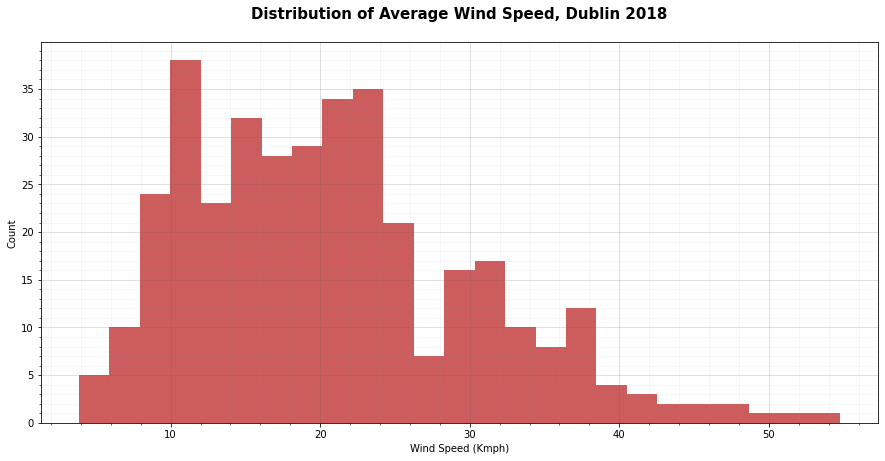

Average Daily Wind Speed Summary Stats:


count    365.000000
mean      20.780137
std        9.465921
min        3.875000
25%       13.375000
50%       19.750000
75%       25.625000
max       54.750000
Name: avgWindSpeed, dtype: float64

median  19.75


In [41]:
plt.figure(figsize=(15, 7))

# average daily wind speed
weatherDF["avgWindSpeed"] = groupByDate["windspeedKmph"].mean().tolist()

# construct histogram
weatherDF['avgWindSpeed'].hist(bins = 25,color='indianred')

# labels
plt.ylabel("Count",size=10)
plt.xlabel("Wind Speed (Kmph)",size=10)
plt.title("Distribution of Average Wind Speed, Dublin 2018\n",size=15, fontweight="bold")

# Add grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

# ticks
# plt.xticks(np.arange(0, 105, step=5))

plt.show()

print("Average Daily Wind Speed Summary Stats:")
display(weatherDF['avgWindSpeed'].describe())
print("median ",weatherDF['avgWindSpeed'].median())

__Analysis__

The distribution above shows a peak at 10-12 Kmpg which makes up about 10% of the average wind speed, followed by a gradual increase to a peak at approximately 22Kmpg which makes up about 9% of average wind speeds. This is followed by a gradual skew to the right. The highest average wind speeds, of between 40 and 50 Kmpg, make up about 2% of all values.

### <font color='indianred'>Distribution of Windspeed by Month

Next I am interested in seeing if there is a change in this distribution of wind speed throughout the year. To do this I will compute a histogram of wind speed for each month of the year.

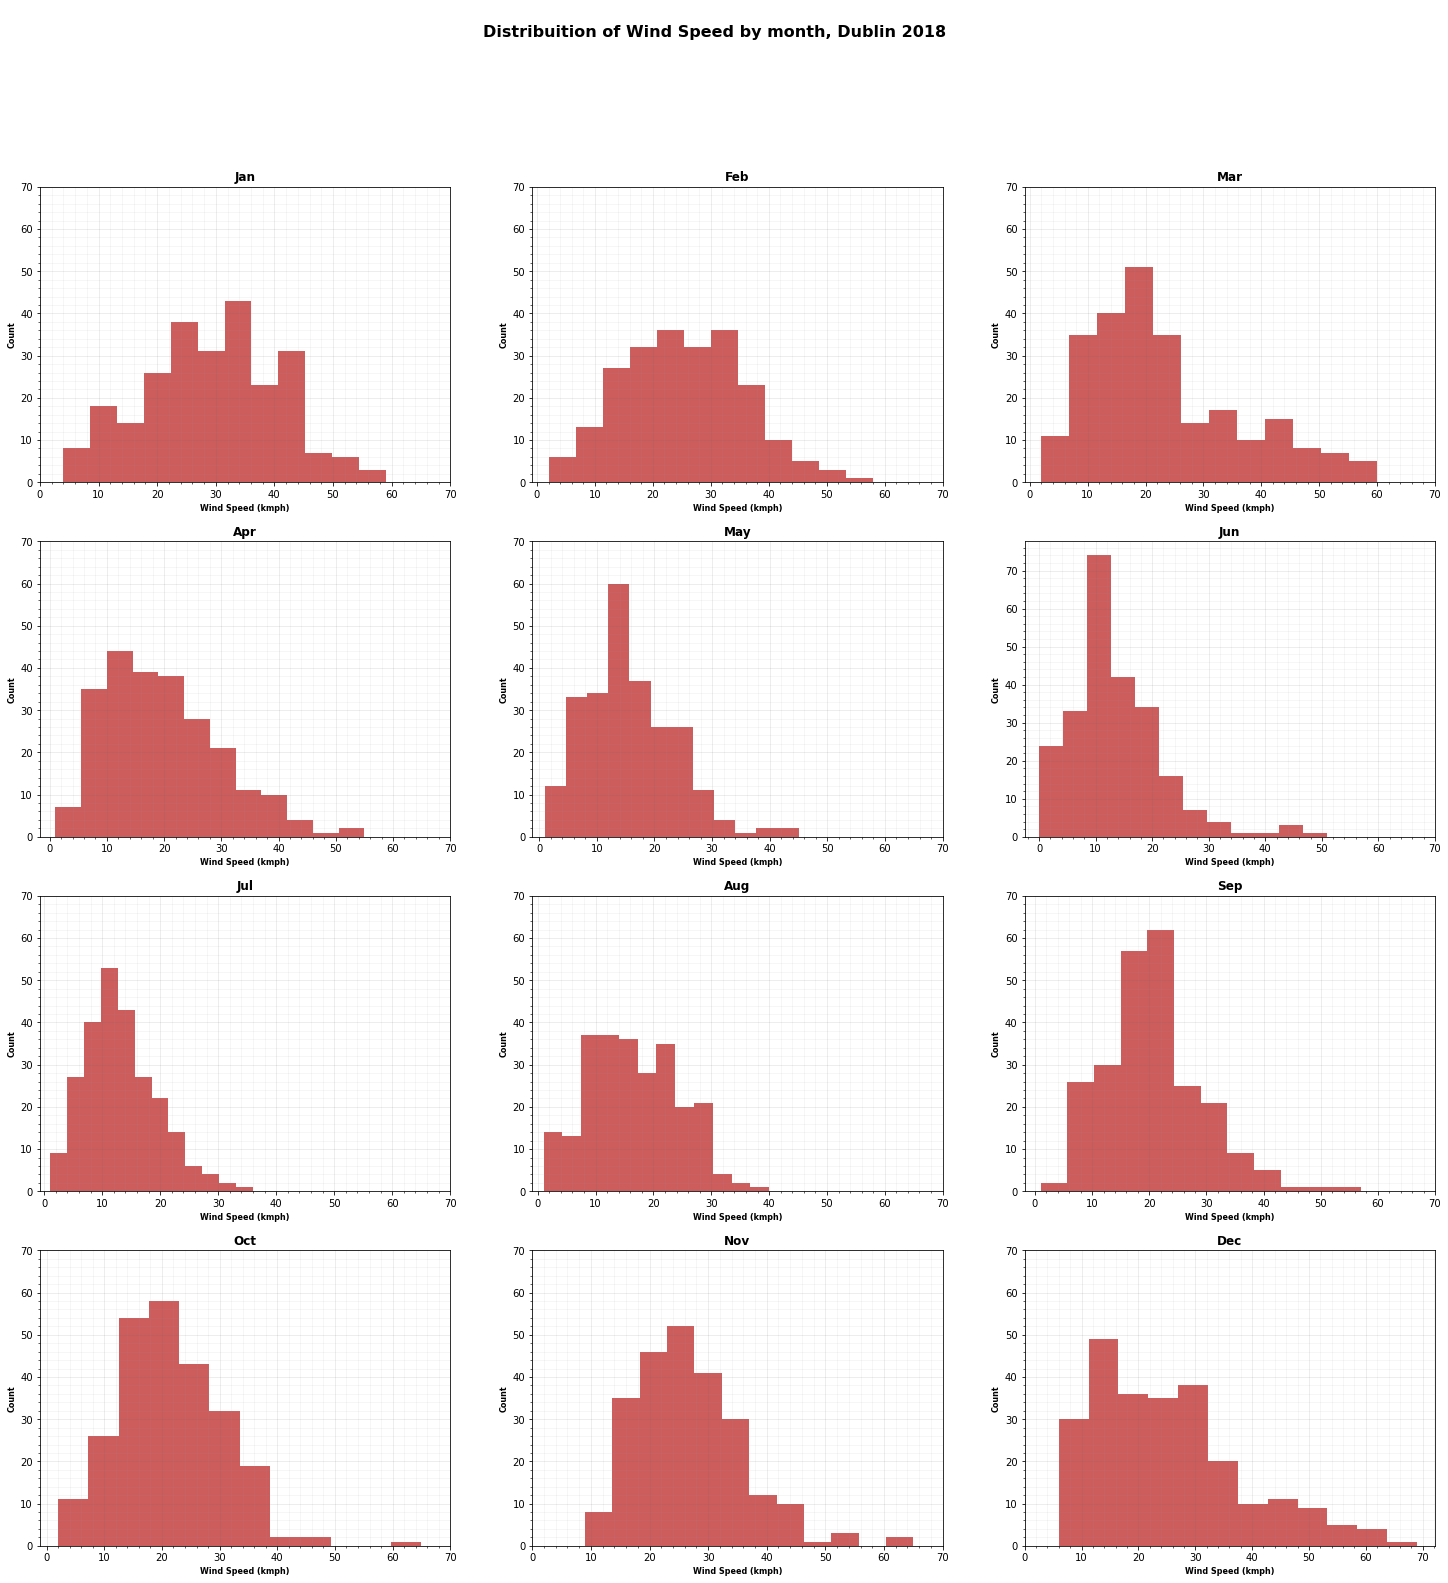

      count       mean        std  min   25%   50%    75%   max
date                                                           
1     248.0  29.419355  11.359846  4.0  22.0  30.0  38.00  59.0
2     224.0  25.183036  10.448571  2.0  17.0  25.0  32.00  58.0
3     248.0  23.173387  13.165644  2.0  13.0  20.0  30.25  60.0
4     240.0  19.600000  10.129207  1.0  12.0  18.0  26.25  55.0
5     248.0  15.681452   7.858010  1.0  10.0  15.0  21.00  45.0
6     240.0  13.479167   8.047426  0.0   9.0  12.0  17.00  51.0
7     248.0  13.270161   6.336355  1.0   9.0  12.0  17.25  36.0
8     248.0  16.419355   7.723561  1.0  10.0  16.0  22.00  40.0
9     240.0  20.495833   8.523655  1.0  15.0  20.0  25.00  57.0
10    248.0  21.233871   8.944370  2.0  15.0  20.0  27.00  65.0
11    240.0  26.654167   9.186195  9.0  20.0  25.0  32.00  65.0
12    248.0  25.084677  12.925076  6.0  15.0  22.0  32.00  69.0
           mean        std   25%   50%    75%
date                                         
1     29.419

In [42]:
# group cloud cover by month
groupWindSpeedByMonth = groupByMonth["windspeedKmph"].apply(list)

# 4 rows and 2 columns
fig, axes = plt.subplots(4, 3, figsize=(25, 25))
fig.suptitle('\nDistribuition of Wind Speed by month, Dublin 2018', fontsize=16, fontweight="bold")
ax = axes.flatten()

i=0 # counter
for month in groupWindSpeedByMonth.index: # for each month
    # construct histogram
    ax[i].hist(groupWindSpeedByMonth[month],bins=12, color='indianred', label="time")
    
    # title, labels
    title = str(calendar.month_abbr[month])
    ax[i].set_title(title, size=12, fontweight="bold")
    ax[i].set_ylabel('Count', size=8, fontweight="bold")
    ax[i].set_xlabel('Wind Speed (kmph)',size=8, fontweight="bold")
    
    # ticks, grid lines
    ax[i].set_xticks(np.arange(0, 80, step=10))
    ax[i].set_yticks(np.arange(0, 80, step=10))
    ax[i].grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.15)
    ax[i].minorticks_on()
    ax[i].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
    i+=1 # incremement counter
plt.show()

print(groupByMonth["windspeedKmph"].describe())
 
# print stats
print(groupByMonth["windspeedKmph"].describe()[["mean","std","25%","50%","75%"]],"\n\nmedian\n",groupByMonth["windspeedKmph"].median())

__Analysis__

Above are histograms of hourly wind speeds grouped by month.

The shape of the distribution is quite similar each month, and is similar to the distribution of the average daily wind speeds for the year from the previous graph.

The distribution in January and February is approximately normal, with a bell shaped curve that peaks at around 30 or 40 Kmph. From March - December we can see bell shaped curves again with peaks between 10 and 30 Kmph, and with a skew to the right. The highest values for wind speeds, of nearly 70 Kmph can be seen in December. The similarly between the distributions each month would indicate that there is not a huge amount of change between wind speeds throughout the year. 

### <font color='indianred'>Line Plot of Windspeed Maximum, Minimum and Daily Windspeed

I have now shown the distribution of wind speed. To get a better idea of the change in wind speed throughout the year, and to see in which months the lowest and highest windspeeds were reached, I decided to plot a lineplot of windspeed vs date. I plotted a lines for the max, min and average daily windspeeds.

In [43]:
# Find the index's of the maximum and minimum wind speed reached

weatherDF["minWindSpeed"] = groupByDate["windspeedKmph"].min().tolist() # daily min wind speed
weatherDF["maxWindSpeed"] = groupByDate["windspeedKmph"].max().tolist() # daily max wind speed


# index of maximum temp reached
maxIndex = weatherDF[['maxWindSpeed']].idxmax()["maxWindSpeed"]
# date of max temp reached
maxLine = weatherDF.iloc[maxIndex]["date"]
# label
maxLabel = "  Max Wind Speed " + str(weatherDF.iloc[maxIndex]["maxWindSpeed"]) +" Kmph\n    " + str(weatherDF.iloc[maxIndex]["date"].date())

# index of minimum temp reached
minIndex = weatherDF[['minWindSpeed']].idxmin()["minWindSpeed"]
# date of min temp reached
minLine = weatherDF.iloc[minIndex]["date"]
# label
minLabel = "  Min Wind Speed " + str(weatherDF.iloc[minIndex]["minWindSpeed"]) +" Kmph\n    " + str(weatherDF.iloc[minIndex]["date"].date())

print("Maximum Wind Speed of ", weatherDF.iloc[maxIndex]["maxtempC"], "Kmph reached on ", weatherDF.iloc[maxIndex]["date"].date())

print("Minimum Wind Speed of ", weatherDF.iloc[minIndex]["mintempC"], "Kmph reached on ", weatherDF.iloc[minIndex]["date"].date())

Maximum Wind Speed of  11 Kmph reached on  2018-12-15
Minimum Wind Speed of  13 Kmph reached on  2018-06-09


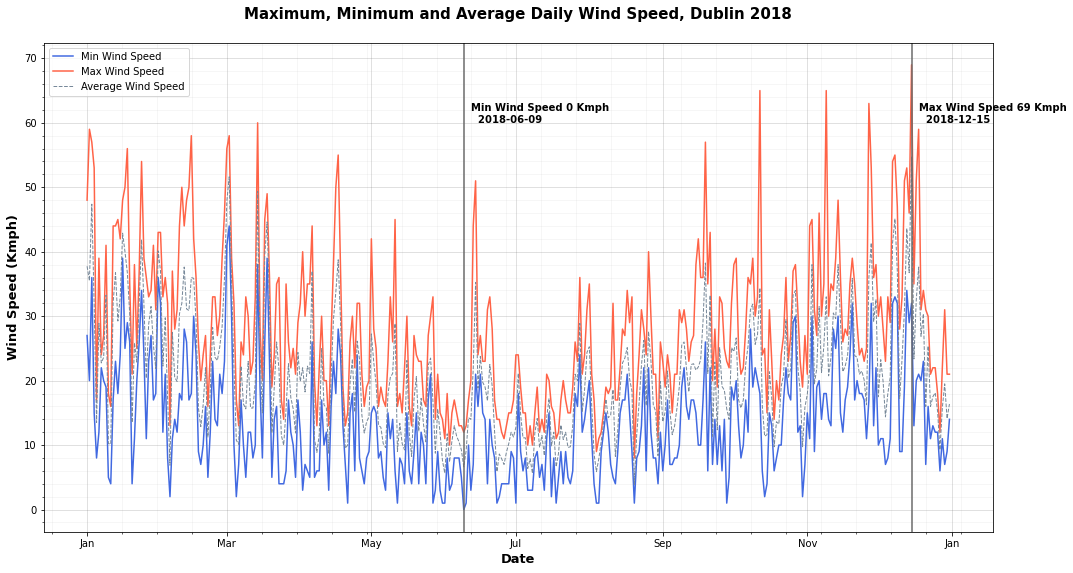

In [44]:

# weatherDF["avgWindSpeed"]
# Plot of wind speed vs Date for Max, Min, Avg daily temp

# Create figure and plot space
fig, ax = plt.subplots(figsize=(17, 9))

# Minimum Temp
ax.plot(weatherDF["date"],
       weatherDF["minWindSpeed"],
       color="royalblue",
       label = "Min Wind Speed")

# Maximum Temp
ax.plot(weatherDF["date"],
       weatherDF["maxWindSpeed"],
       color="tomato",
       label = "Max Wind Speed")


# Average Temp
ax.plot(weatherDF["date"],
       weatherDF["avgWindSpeed"],
       '--',  linewidth=1,
       color="lightslategrey",
       label = "Average Wind Speed")

# Vertical lines for maximum and minimum temperatures reached
plt.axvline(maxLine, c="dimgrey")
plt.text(maxLine,60,maxLabel,fontweight='bold')

plt.axvline(minLine, c="dimgrey")
plt.text(minLine,60,minLabel,fontweight='bold')

# Set title and labels for axes
plt.xlabel(xlabel="Date", weight='bold', size = 13)
plt.ylabel(ylabel="Wind Speed (Kmph)", weight='bold', size = 13)
plt.title("Maximum, Minimum and Average Daily Wind Speed, Dublin 2018\n", weight='bold', size = 15)


# Format date to display month name
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)

# Add legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(labels)

# Add grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.25)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)


plt.show()

__Analysis__

The graph above clearly shows the change in wind speed throught the year. High max daily wind speeds can be seen early in the year from January - April, with highs of around 55-60 Kmph. The average wind speed is typically lower in the summer months, between 10 and 39 Kmph, however some spikes in the max wind speeds can be seen in these months as high as 50 Kmph. The max windspeed is very high again into the later months of the year, from October - December, with a high of 69Kmp on the 15th of December, which was the high for the year. The minimum wind speeds don't change drastically throughout the year, but are slightly higher in the winter months. The lowest wind speed was 0 Kmph on the 9th of June. 

# <font color='firebrick'>Analysis Summary

My study of this dataset of the weather in Dublin for 2018 has given me a great insight into the current climate in Ireland. The weather attributes which I focused on in my analysis were temperature, precipitation, cloud cover, sunrise, sunset and wind speeds. I looked at the distribution of these attributes, how they changed throughout the day and throughout the year, and the relationship between many of these attributes. 

#### <font color='indianred'>Temperature

The first attribute which I focused on was temperature. The line plot of the daily max, min and average temperatures showed the change in temperatures throughout the year. The temperature was highest in the summer months, with a high of 22 °C in July. The temperature was significantly lower in the early months of the year from January-April, and in the later months from October-December, with a low of - 2 °C in March. The histogram of the average daily temperatures should a relatively normal distribution, with a mean of about 10 °C. The heat map of hourly temperatures for each month showed the change in temperature throughout the day for each month. It is clear that the temperature was typically coldest in the early morning, reached a high in the afternoon, and gradually became colder again into the evening. This trend was consistent throughout the year, typically with higher values for the maximum and minimum temperatures reached in the summer months, and lower values in the winter. 

#### <font color='indianred'>Precipitation

The next attribute which I analysed was precipitation. The line plot of total daily precipitation for the year gives a good overview of the years precipitation. It is immediately clear from the graph that it rained very frequently throughout the year. The longest span with no rain, as shown on the graph, was in June and lasted 13 days. It is also clear that the highest levels of rainfall were in the early and late months of the year, from January-April and October-December. The day with the highest level of precipitation occurred in October and was 11 mm. The graph also shows the 6 highest days of precipitation after this, which can be seen in January-April and October-December, with values between 6.8 and 10 mm. From this graph, with multiple precipitation highs of above 6 mm, and a longest span of only 13 days with no rainfall, one might think that it rained quite heavily for a large portion of the year. However, this may not be the case at all so it is important to also look at a histogram, to see the mean and the distribution of the data. It is immediately clear from the histogram that on average it did not rain very heavily. 60% of the values for precipitation are below 0.5 mm. The highest daily precipitation value of 11 mm can be seen as an outlier which makes up only about 0.5% of the values. In fact, daily precipitation values above 3.5 mm only make up about 5.5% of the daily values overall.

#### <font color='indianred'>Temperature & Precipitation

After analysing temperature and precipitation I wondered about the relationship between these two attributes. I constructed a scatter plot, however no obvious linear relationship was visible. I computed a line of best fit whose line indicated a weak negative linear relationship, and to verify this I computed the correlation coefficient which was - 0.117. Thus there is a weak linear relationship between temperature and precipitation. 

#### <font color='indianred'>Cloud Cover

The next weather element that I decided to analyse was cloud cover. I started by constructing a histogram of the daily cloud cover averages. The histogram showed a peak at 55-60% which made up about 9% of the values, and a peak at 25-30% which made up about 6% of the values. These two peaks indicate a bimodal distribution. The distribution around the second peak is approximately normal, indicated by the bell shaped curve. The distribution around the first peak is skewed to the left. 

To see if there was any difference in the distribution of cloud cover throughout the day I decided to compute histograms of the cloud cover for each hour. It was immediately from the similarity between the distributions for each hour that time did not have a great affect on the distribution. Next I decided to construct histograms of the distribution of cloud cover for each month to see if the time of year had an affect on the distribution. I computed 12 histograms, one for each month of the year.  In the early months of the year, from January to April, large peaks can be seen in the high percentages for cloud cover %, between 90-100%, with small peaks between 0 and 30%, and relatively uniform distribution for the rest of the values. We can see that 90-100% cloud cover makes up about 26% of cloud cover in January, 18% in February, 39% in March and 25% in April. In May the data is skewed to the right, with a peak at 0-10%, which makes up about 18% of cloud cover, and a peak at 90-100% which makes up 12%. Similarly, the data is skewed to the right in June with 0-10% cloud cover making up about 25% of cloud cover. In July, August and September, the distribution is relatively uniform, with small peaks at 90-100% in August and September, and a peak at 0-10% in September. The distribution in October could be said to be bimodal, with a peak at 0-10%, a gradual decline/skew to the right, followed by a gradual incline to a peak at 90-100%. Similar to the earlier months of the year, November and Decmber have a high peak at 90-100%, with 90-100% cloud cover % making up 33% of cloud cover in November and 42% in December. So we can conclude that the highest cloud cover percentages of 90-100% were the most common values in the Months of January-April and November-December. During the middle of the year we typically saw a lot more lower values for cloud cover %.

#### <font color='indianred'>Cloud Cover & Precipitation

After analysing cloud cover I then wondered if there may be a relationship between cloud cover and precipitation. Rain is formed when the water droplets in clouds become too heavy to stay suspended in the clouds, and so fall to the earth as rain. Because of this, I predicted that there may be a relationship between cloud cover and precipitation, which I predicted to be a positive linear relationship. I constructed a scatter plot of cloud cover and precipitation. It is clear from the scatter plot that there is a positive linear relationship, however the relationship is not very strong. To put a numeric value on this relationship I computed the correlation coefficient which was 0.489, indicating a positive linear relationship, but not a particularly strong one. 

#### <font color='indianred'>Sunrise & Sunset

Next I decided to look at the sunrise and sunset times. I computed a line plot of sunrise and sunset times throughout the year. The graph clearly shows the change in the sunrise and sunset times throughout the year. At the start of January the sun rises late in the morning at around 8:40am. This slowly falls to around 7:45 in mid February, 6:45 mid March and so on, until it reaches around 3:57am in June. From here it slowly starts to increase again until it reached about 7:30am at the end of December. Similarly for the sunset, the sun sets very early in the evening at the start of January at around 4:20pm. This slowly rises to a max of around 8:57pm, and then slwoly falls back down to around 16:07 in December.

The daylight hours for a day is the number of hours between sunset and sunrise. This can be seen in the graph by the space between the sunset and sunrise line. It is clear from the graph that the daylight hours are much lower at the start of the year, slowly increasing and reaching a high in the middle of the year, before gradually decreasing again into the later months. The longest day can be seen by the first vertical line. This was on the the 17th of June and was 17 hours long. The shortest day can be seen by the second vertical line. This was on the the 19th of December and was 7 hours and 30 minutes long.


#### <font color='indianred'>Windspeed

The next weather element that I was interested in was wind speed. To visualise its distribution I computed a histogram of the average daily windspeed. The histogram showed a peak at 10-12 Kmpg which made up about 10% of the average wind speed, followed by a gradual increase to a peak at approximately 22Kmpg which made up about 9% of average wind speeds. This was followed by a gradual skew to the right. The highest average wind speeds, of between 40 and 50 Kmpg, made up about 2% of all values. Next I was again interested in seeing if there was a change in this distribution throughout the year. To do this I computed a histogram of wind speed for each month of the year. It was immediately clear that the shape of the distribution was quite similar each month, and was very similar to the distribution of the average daily wind speeds for the year from the previous graph.

The histograms showed the distribution of wind speed. To get a better idea of the change in wind speed throughout the year, and to see in which months the lowest and highest windspeeds were reached, I decided to plot a lineplot of windspeed vs date. I plotted a lines for the max, min and average daily windspeeds. High maximum daily wind speeds can be seen early in the year from January - April, with highs of around 55-60 Kmph. The average wind speed is typically lower in the summer months, between 10 and 39 Kmph, however some spikes in the max wind speeds can be seen in these months as high as 50 Kmph. The max windspeed is very high again into the later months of the year, from October - December, with a high of 69Kmp on the 15th of December, which was the high for the year. The minimum wind speeds don't change drastically throughout the year, but are slightly higher in the winter months. The lowest wind speed was 0 Kmph on the 9th of June.


### <font color='firebrick'>Ideas for Future Analysis

When analysing this data there were a huge amount of weather elements to choose from. The weather attributes which I focused on in my analysis were temperature, precipitation, cloud cover, sunrise, sunset and wind speeds. For this project, I wanted to analyse these attributes in detail, with multiple different graphs for each, which is why I decided to focus in on only a few attributes. For future analysis I would love to look at some of the other attributes in more detail, such as pressure, UV index, sun hour and humidity. I would like to explore the distributions of these attributes as well as the relationships between them.

For this project I decided to look at just Dublin and for just 2018. I had contemplated looking at multiple different locations around the globe, so that I could make some interesting comparisons, however I decided to focus on just the one location so that I could analyse it in more detail. The data from this weather API gives a great overview of the climate in a location due to the vast amount of weather attributes provided, so I think that in the future I think it would be really interesting to look at multiple different locations to compare the climates. 

The main extension on my analysis in this project that I would really love to do in the future would be to look at the weather data for Dublin for a much longer period of time. I believe this would give a really great insight into the affect of climate change and global warming on our climate. When choosing this API this was my initial plan, however I soon realised that to get any really interesting insights into the affect of global warming I would need at least 50-100 years of weather data, which would result in a dataset far too large for this project. If I were to analyse a much larger dataset like this, say from the past 100 years for Dublin, I might group my data by decade and look at the changes between each 10 year span on each of the weather elements which I analysed in my project. I believe this would result in some very interesting findings, such as an increase in temperature, and an increase in maximum precipitation levels reached due to more intense precipitation events caused by global warming.

### <font color='firebrick'>Conclusion

This dataset had been extremely enjoyable to study. I gained a great insight into the weather in Dublin, particularly the distribution of many of the weather elements and their trends throughout the day and throughout the year. As mentioned above, I would really love to extend this project further to analyse the data over a much longer period of time, as I believe I would be able to come to some very interesting conclusions about global warming and it's affect on many of the weather elements in Ireland.